# Raport
## Weekly 2
Przemysław Olender

Paweł Wojciechowski

Krzysztof Wolny

Tematem naszego projekt jest zbadanie zależności pomiędzy rozwojem koronawirusa a różnymi czynnikami takimi jak sposób odżywiania w danym państwie, indeks rozwoju gospodarczego, wiek społeczeństwa czy gęstość zaludnienia. Szukaliśmy zależności pomiędzy liczbą przypadków zachorowań i zgonów a rodzajem diety mieszkańców danego państwa.

In [1]:
library(dplyr)
library(ggplot2)
options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
owid <- read.csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
kcal <- read.csv('Food_Supply_kcal_Data.csv')

In [3]:
#główna ramka danych o koronawirusie, dev level to 3 kategorie hdi

owid <- owid %>% 
  mutate(dev_level = ifelse(human_development_index < 0.6, 1, ifelse(human_development_index < 0.8, 2, 3))) %>% 
  left_join(kcal, by = c("location" = "Country"))

#dane sprzed kilku tygodni

now <- owid %>% 
  filter(date == '2020-11-11')

#kraje z ponad 100 000 zakażeń

sto <- now %>% filter(total_cases > 100000)

Ważne jest wybranie danych sprzed tygodnia lub dwóch, ponieważ dla niektórych ważnych statystyk wartości nie są jeszcze wyliczone.

In [4]:
owid %>%
group_by(date)%>%
summarise_each(funs(sum(is.na(.))))%>%
select(date,total_tests_per_thousand, reproduction_rate )%>%tail(20)

date,total_tests_per_thousand,reproduction_rate
<fct>,<int>,<int>
2020-11-11,108,14
2020-11-12,108,14
2020-11-13,108,14
2020-11-14,108,14
2020-11-15,105,14
2020-11-16,107,14
2020-11-17,106,14
2020-11-18,105,14
2020-11-19,105,14


## Human development index

W bogatszych państwach robi się znacznie więcej testów, dlatego przypadków również jest więcej, co ciekawe śmiertelność nie jest na ogół wyższa w krajach mniej rozwiniętych.

Porównaliśmy również długość życia z liczbą zarażonych i zmarłych. Tutaj trzeba pamiętać, że państwa o dłuższym life expentancy są krajami lepiej rozwiniętymi i wykonuja więcej testów. 

Podzieliliśmy kraje na 3 kategorie według wartości wskaźnika hdi:
1 - kraje o hdi < 0.6,
2 - kraje o hdi $\in$  [0.6, 0.8),
3 - kraje o hdi >= 0.8.

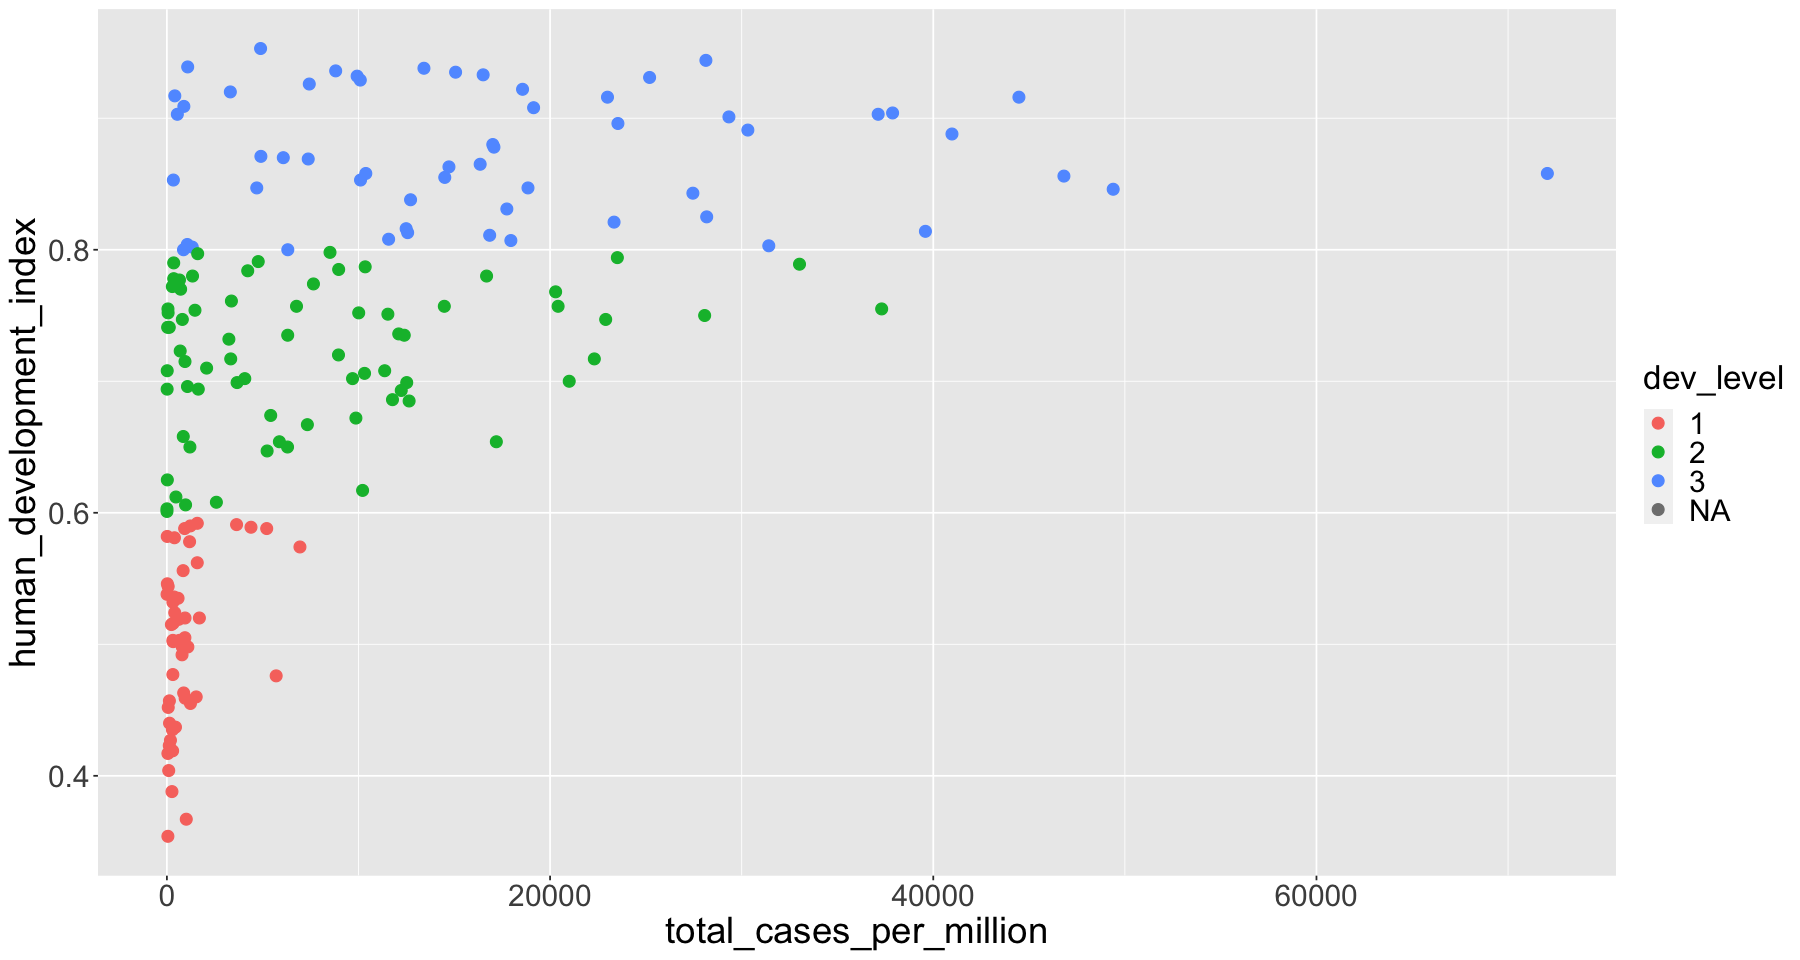

In [5]:
#zakażenia a hdi
options(repr.plot.width=15, repr.plot.height=8)
now$dev_level <- factor(now$dev_level, c("1", "2", "3"))
now_smoothed <- now %>% filter(!(location %in% c('United States', 'Brazil', 'India')))

ggplot(now_smoothed, aes(x = total_cases_per_million, y = human_development_index, color = dev_level)) +
    geom_point(size = 3)+
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

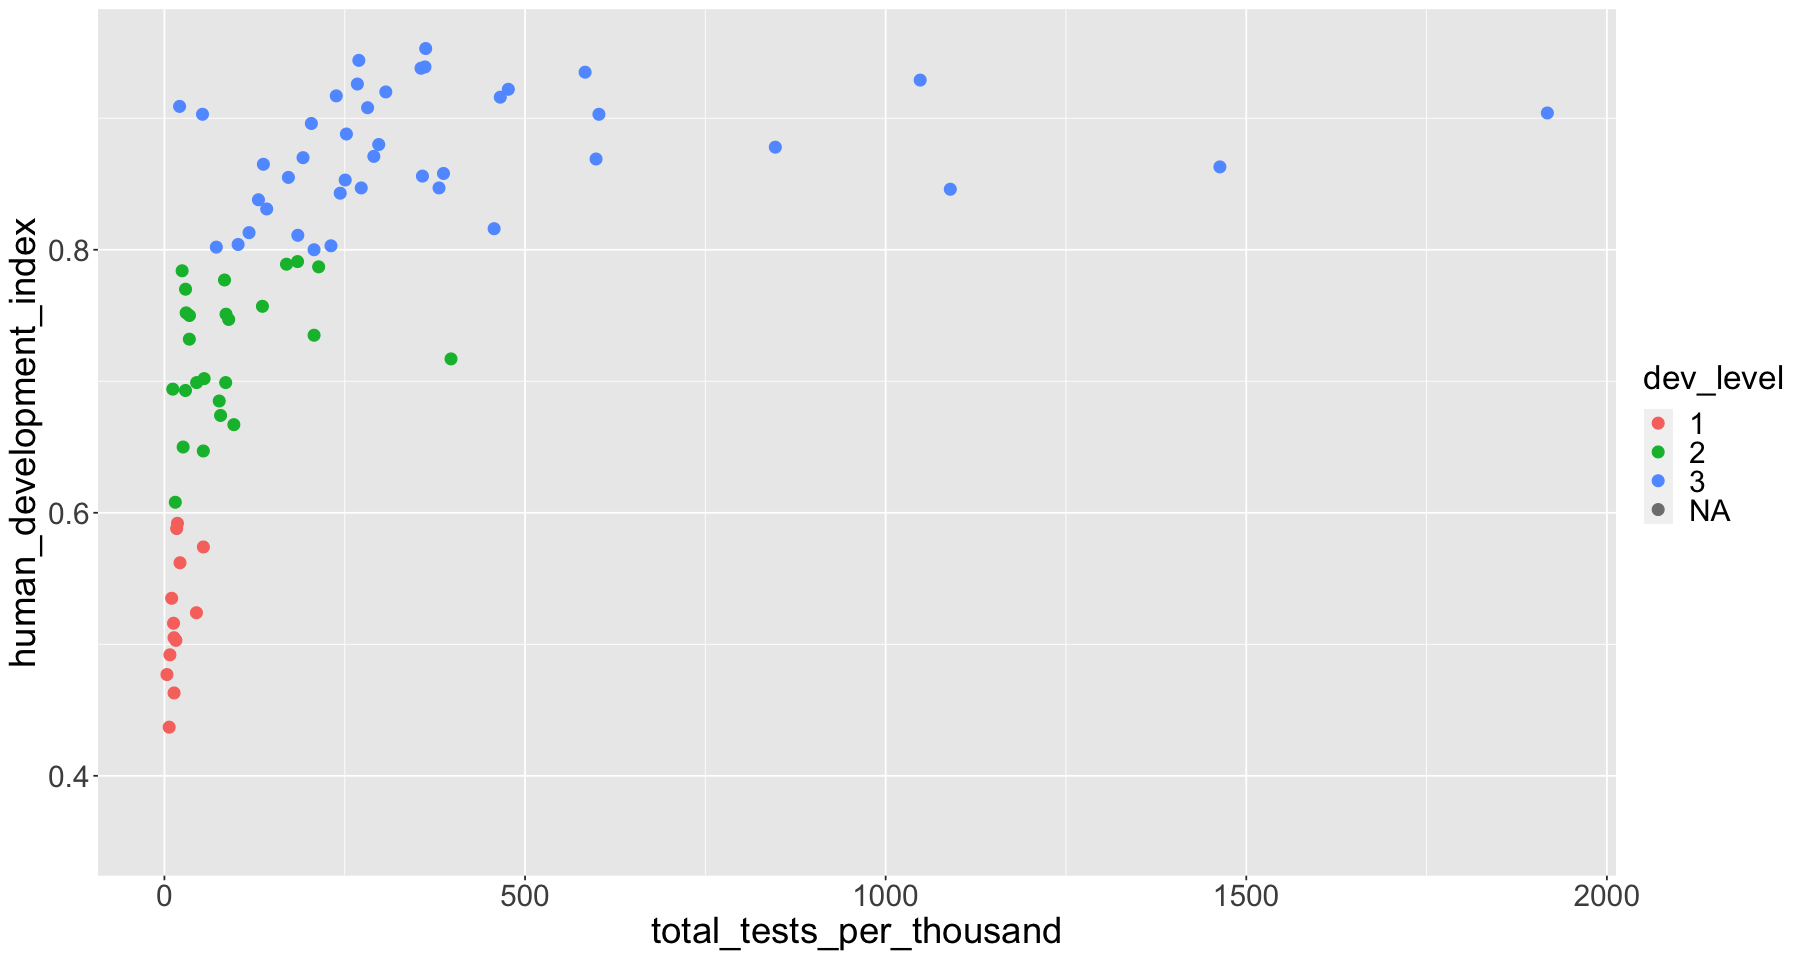

In [6]:
#testy a hdi

ggplot(now_smoothed, aes(x = total_tests_per_thousand, y = human_development_index, color = dev_level)) +
    geom_point(size = 3) +
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

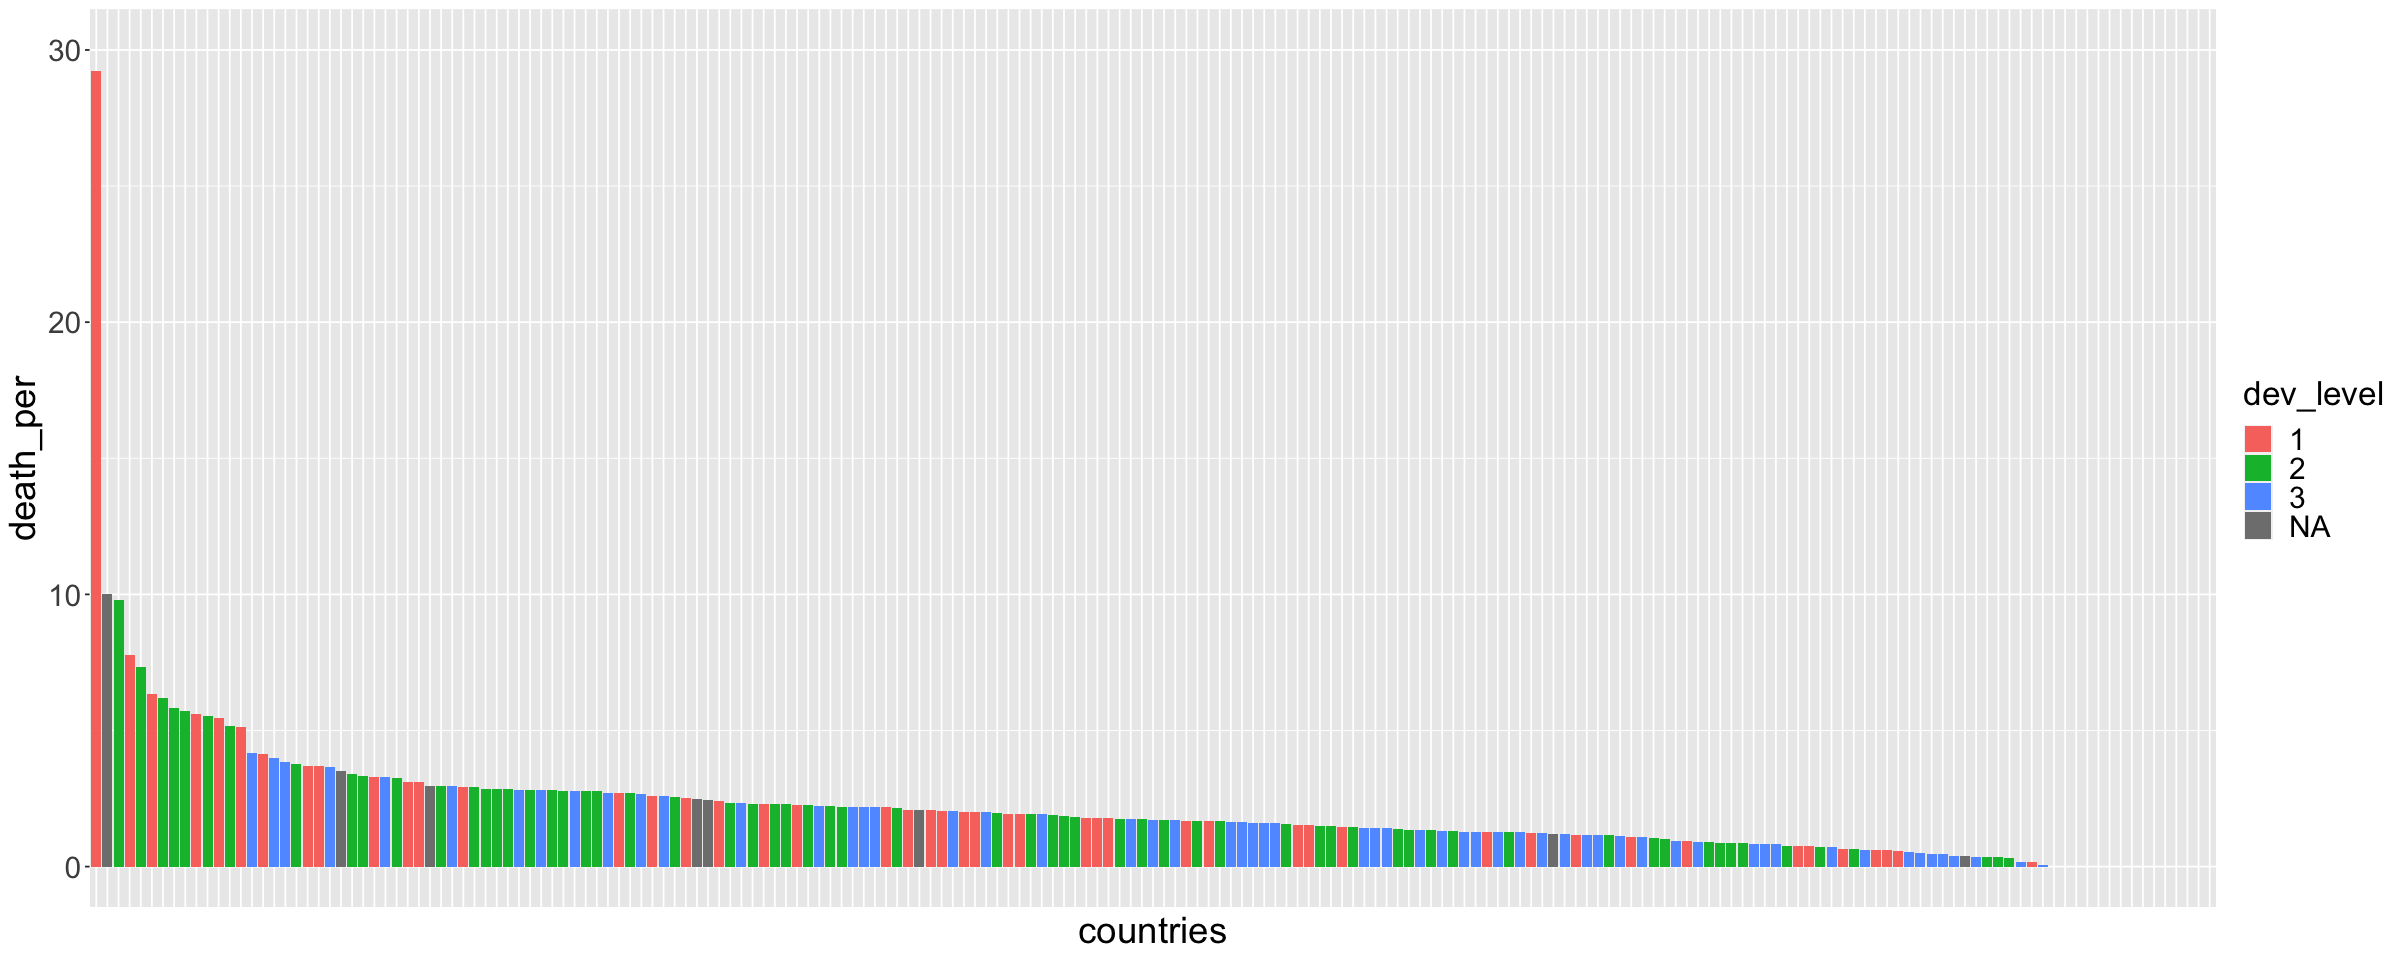

In [7]:
# odestek śmierci od testów

now_1 <- now  %>% mutate(death_per = total_deaths / total_cases * 100)  %>% arrange(desc(death_per))

now_1$location <- factor(now_1$location, levels = now_1$location)

options(repr.plot.width = 20, repr.plot.height = 8)

ggplot(now_1, aes(x = location, y = death_per, fill = dev_level)) +
    geom_bar(stat = 'identity') +
    theme(
    axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1)
    ) + 
    ylim(0, 30) +
    theme(
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
        #axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18))+
    xlab("countries")

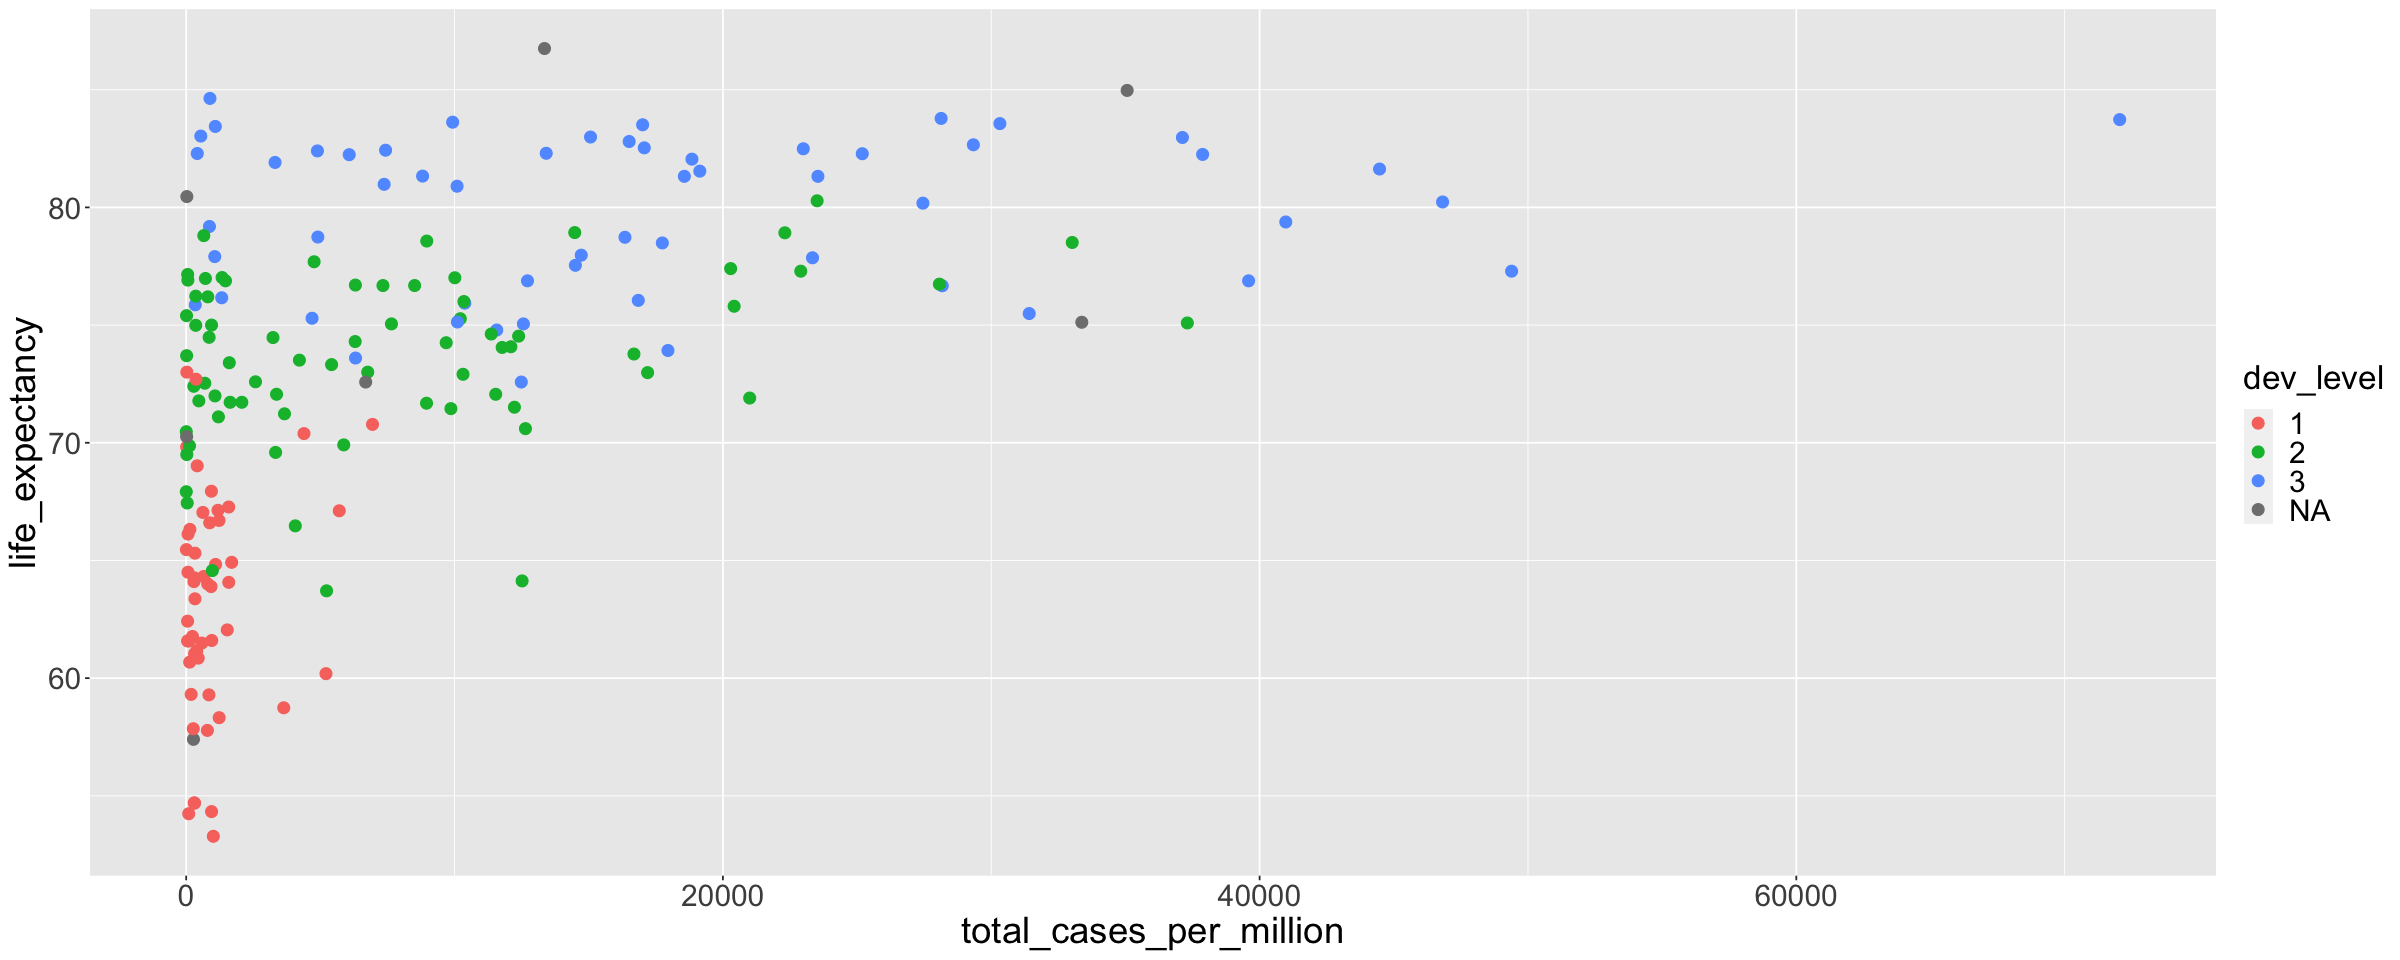

In [8]:
#oczekiwana długość życia a zakażenia, im większa długość tym więcej zakażeń

ggplot(now_smoothed, aes(x = total_cases_per_million, y = life_expectancy, color = dev_level)) +
    geom_point(size = 3) +
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

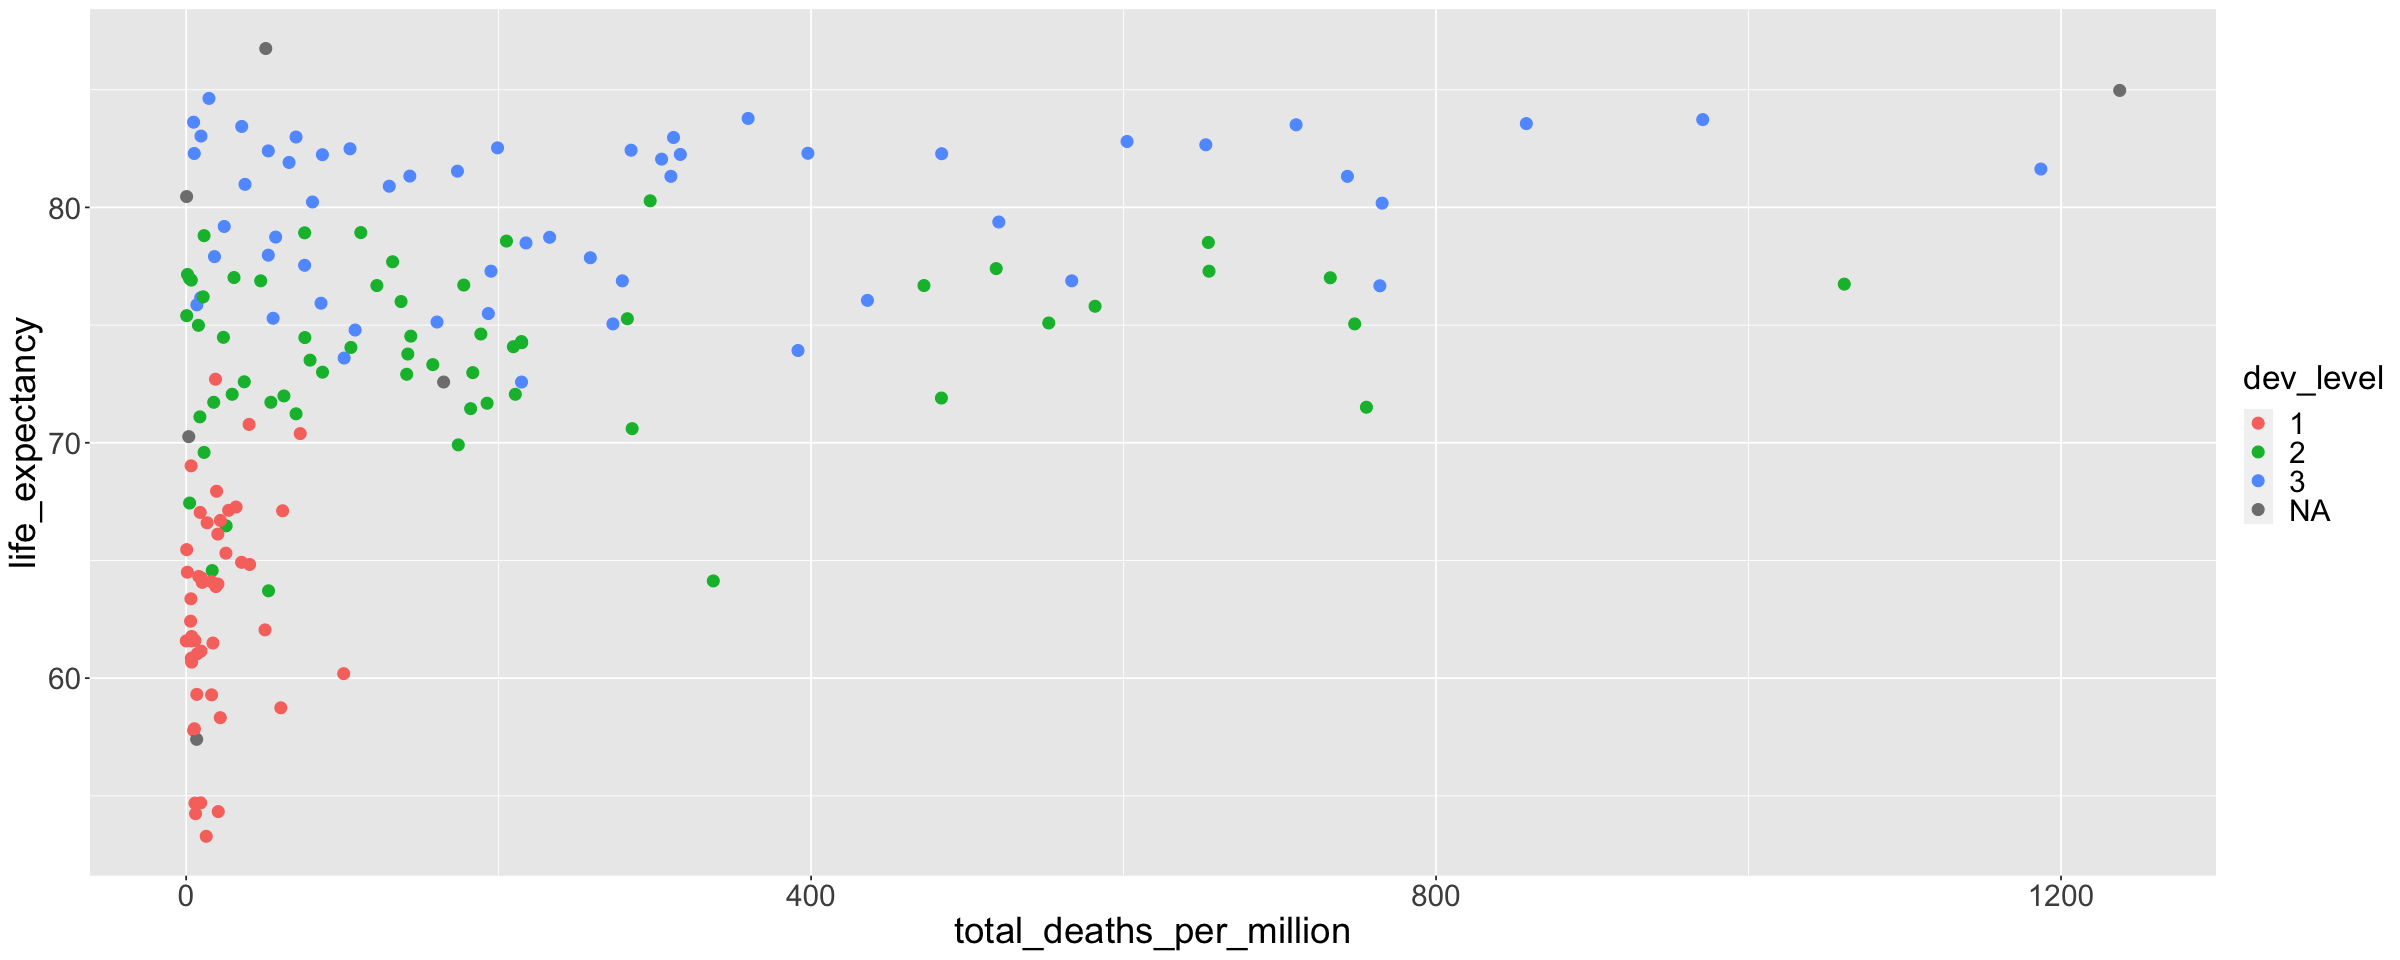

In [9]:
#oczekiwana długość życia a liczba zgonów, im większa długość tym więcej zgonów

ggplot(now_smoothed, aes(x = total_deaths_per_million, y = life_expectancy, color = dev_level)) +
    geom_point(size = 3) +
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

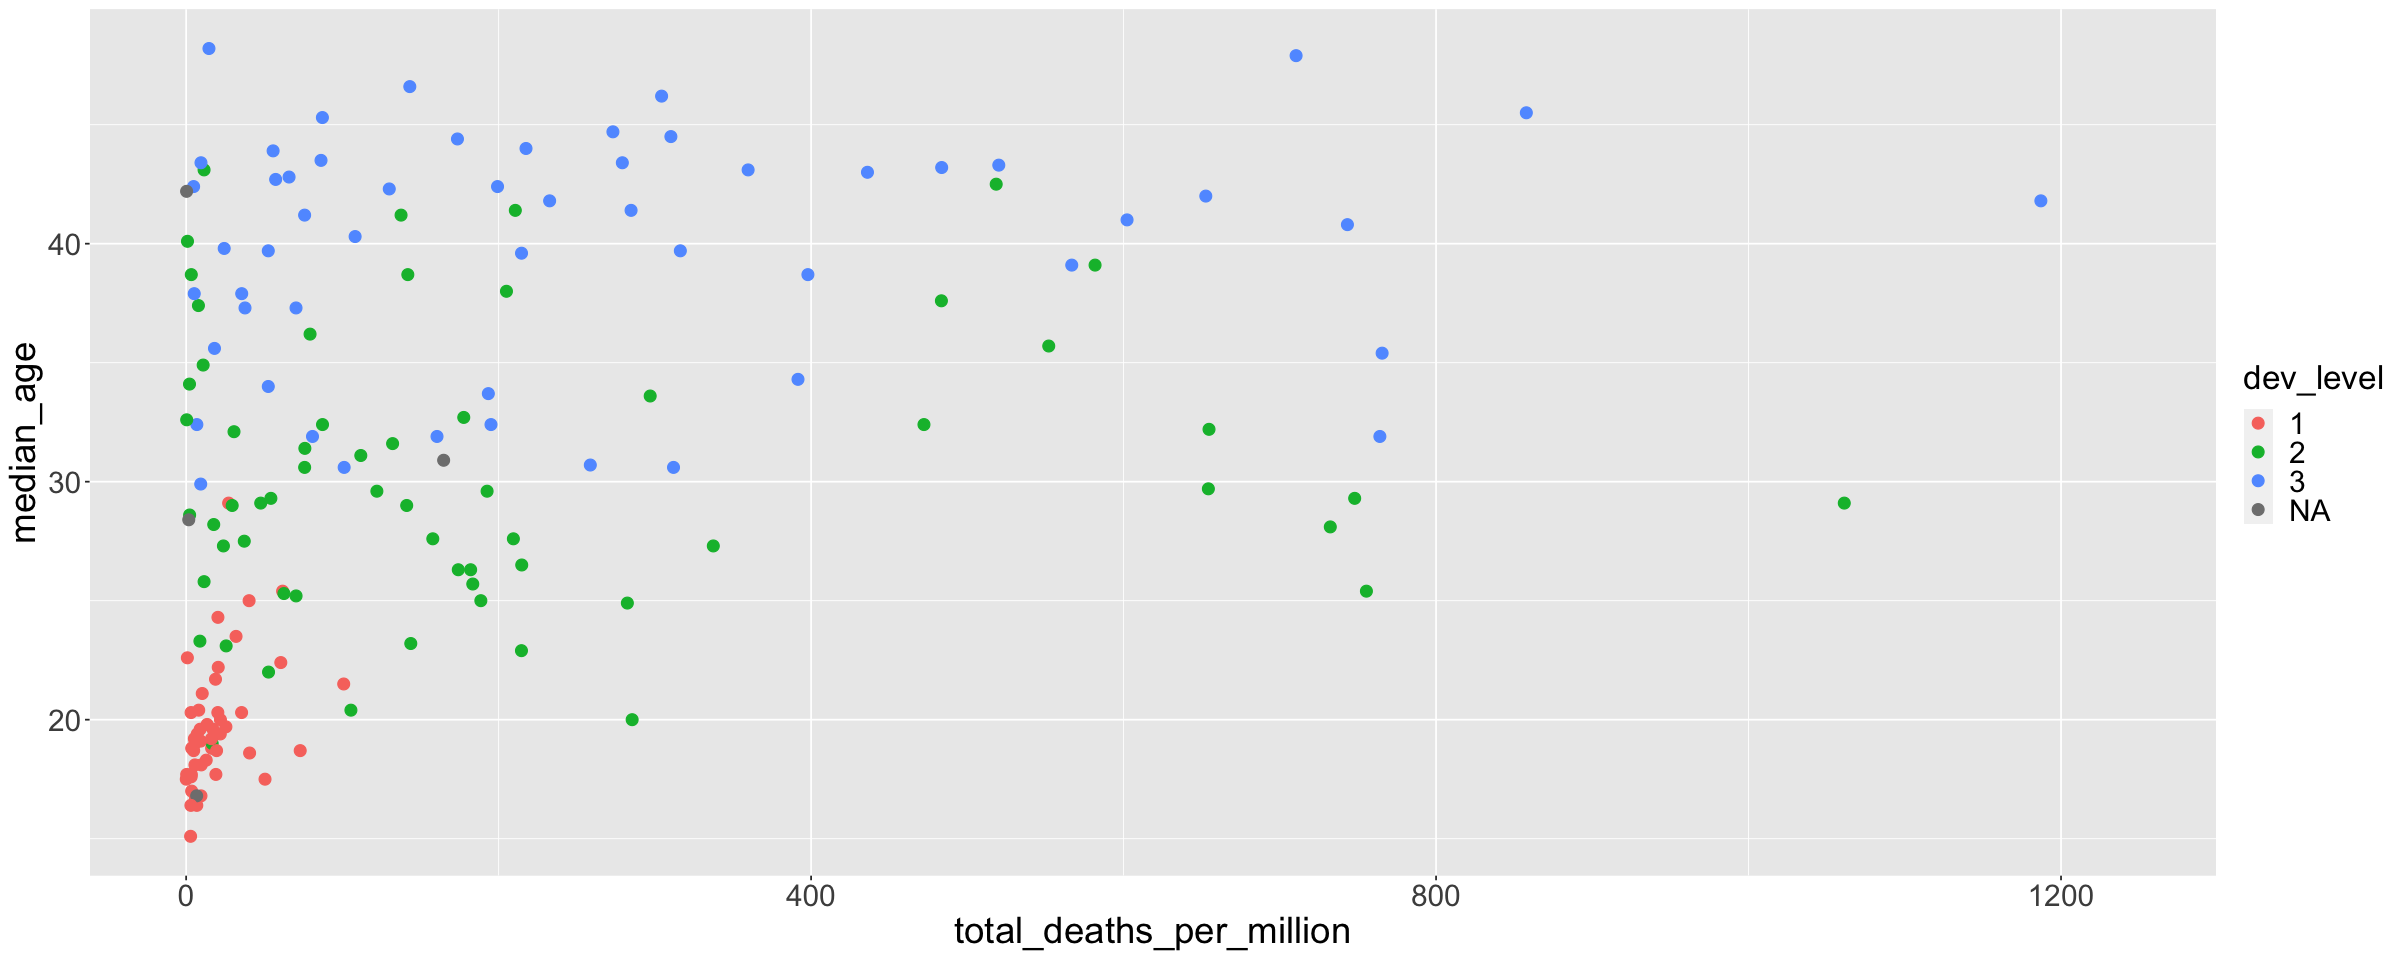

In [10]:
#mediana wieku a liczba zgonów, im wyższa mediana tym więcej zgonów

ggplot(now_smoothed, aes(x = total_deaths_per_million, y = median_age, color = dev_level)) +
    geom_point(size = 3) + 
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

## Styl życia
Chcieliśmy zobaczyć jak styl życia, czyli dieta, spożywanie alkoholu, palenie papierosów wpływa na ilość przypadków koronawirusa
. 
Najpierw porównaliśmy, jakie są zależności pomiędzy stylem życia w krajach, a ilością zakażeń. Jednak, aby zwiększyć dokładność wyników uwzględniliśmy później jedynie kraje, w których wykryto ponad 100tys zakażeń. W ten sposób uzyskaliśmy bardziej wiarygodną tendencję, ponieważ w biednijeszych krajach dieta jest oparta bardziej na produktach roślinnych a wykonuje się tam mniej testów.

Jak widać, im większy procent mięsa w diecie tym większa liczba zachorowań, im więcej produktów roślinnych tym mniej zachorowań. Alkohol i papierosy mają dużo mniejszy wpływ na rozwój wirusa.

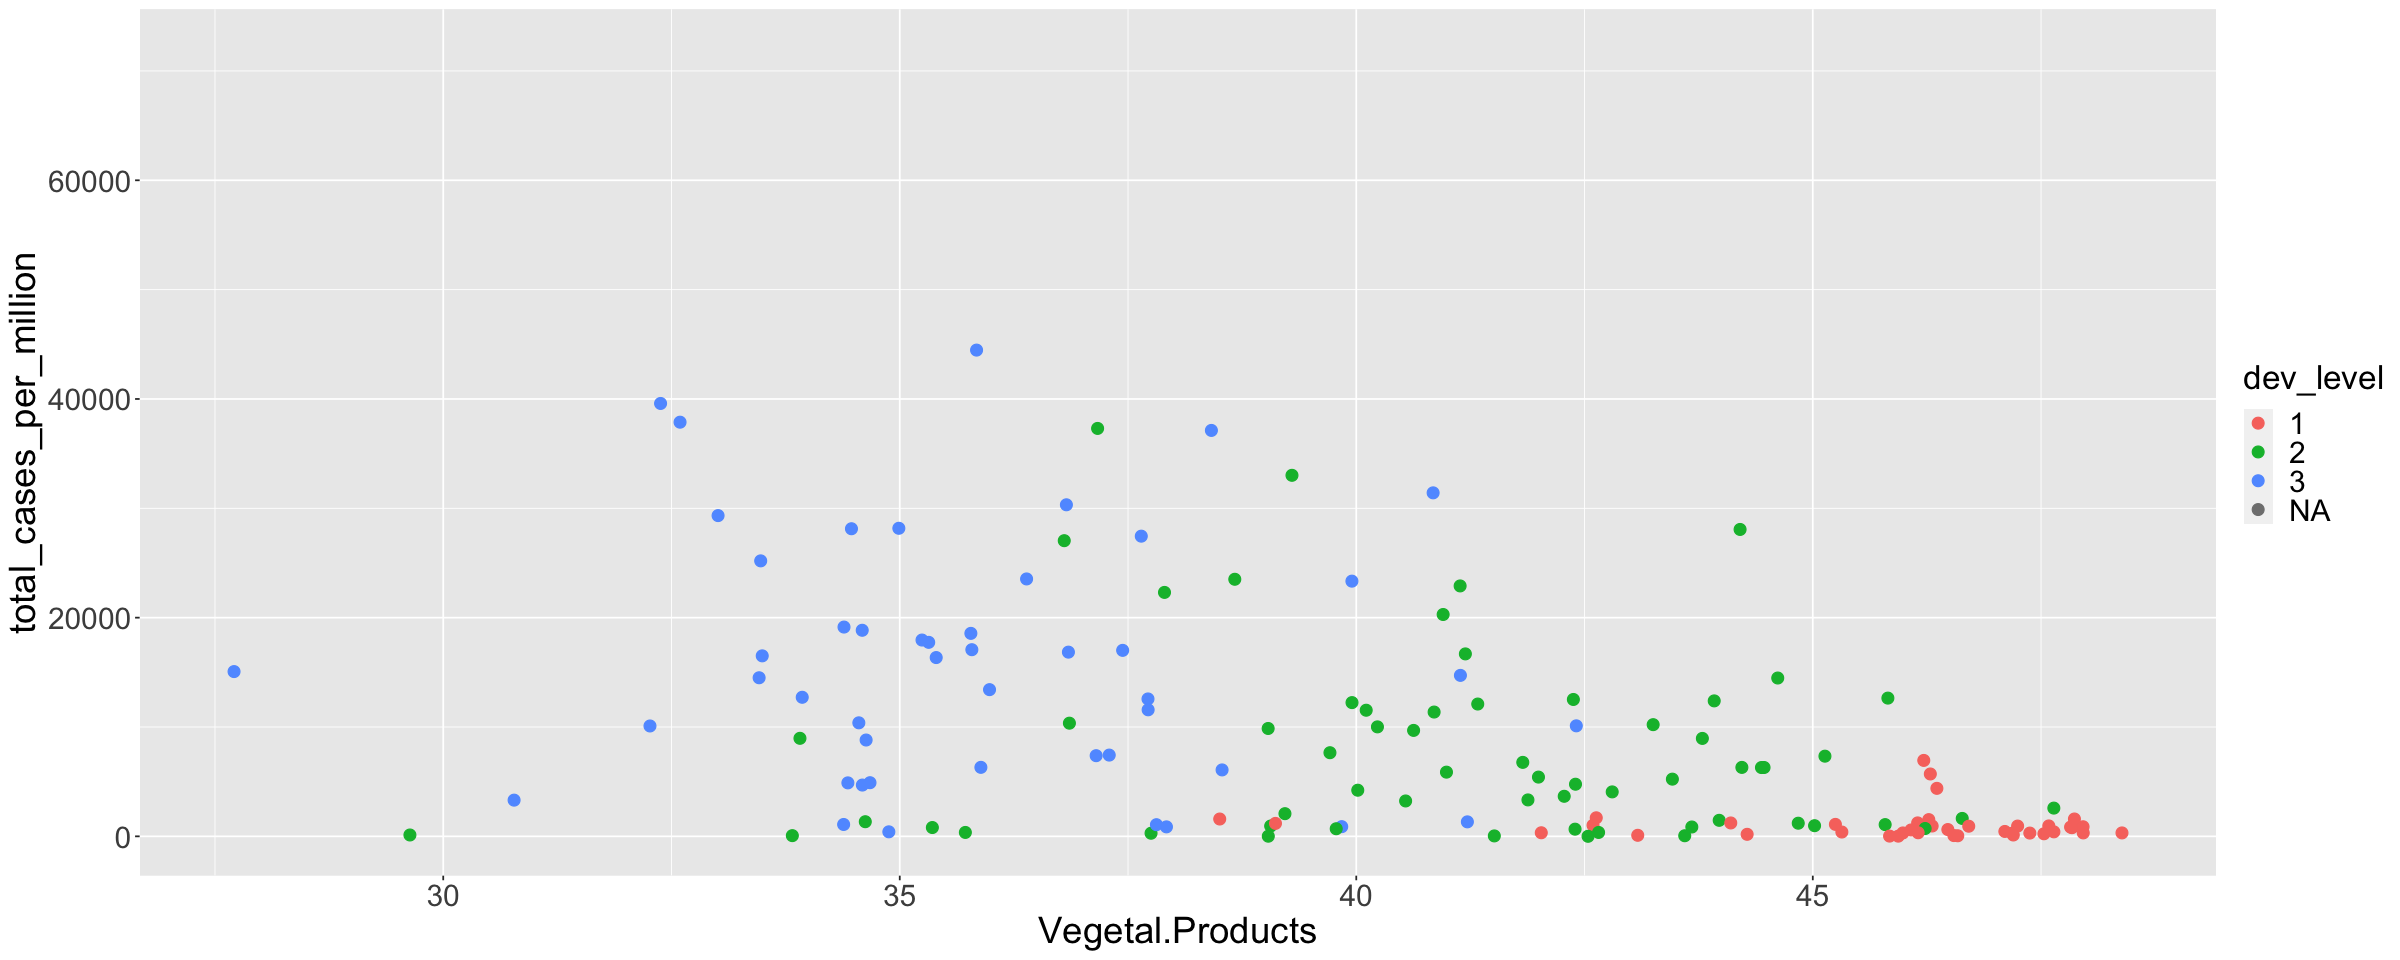

In [11]:
# produkty wegetariańskie a liczba przypadków

ggplot(data=now, aes(x=Vegetal.Products, y=total_cases_per_million, color = dev_level))+
  geom_point(size = 3) +
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

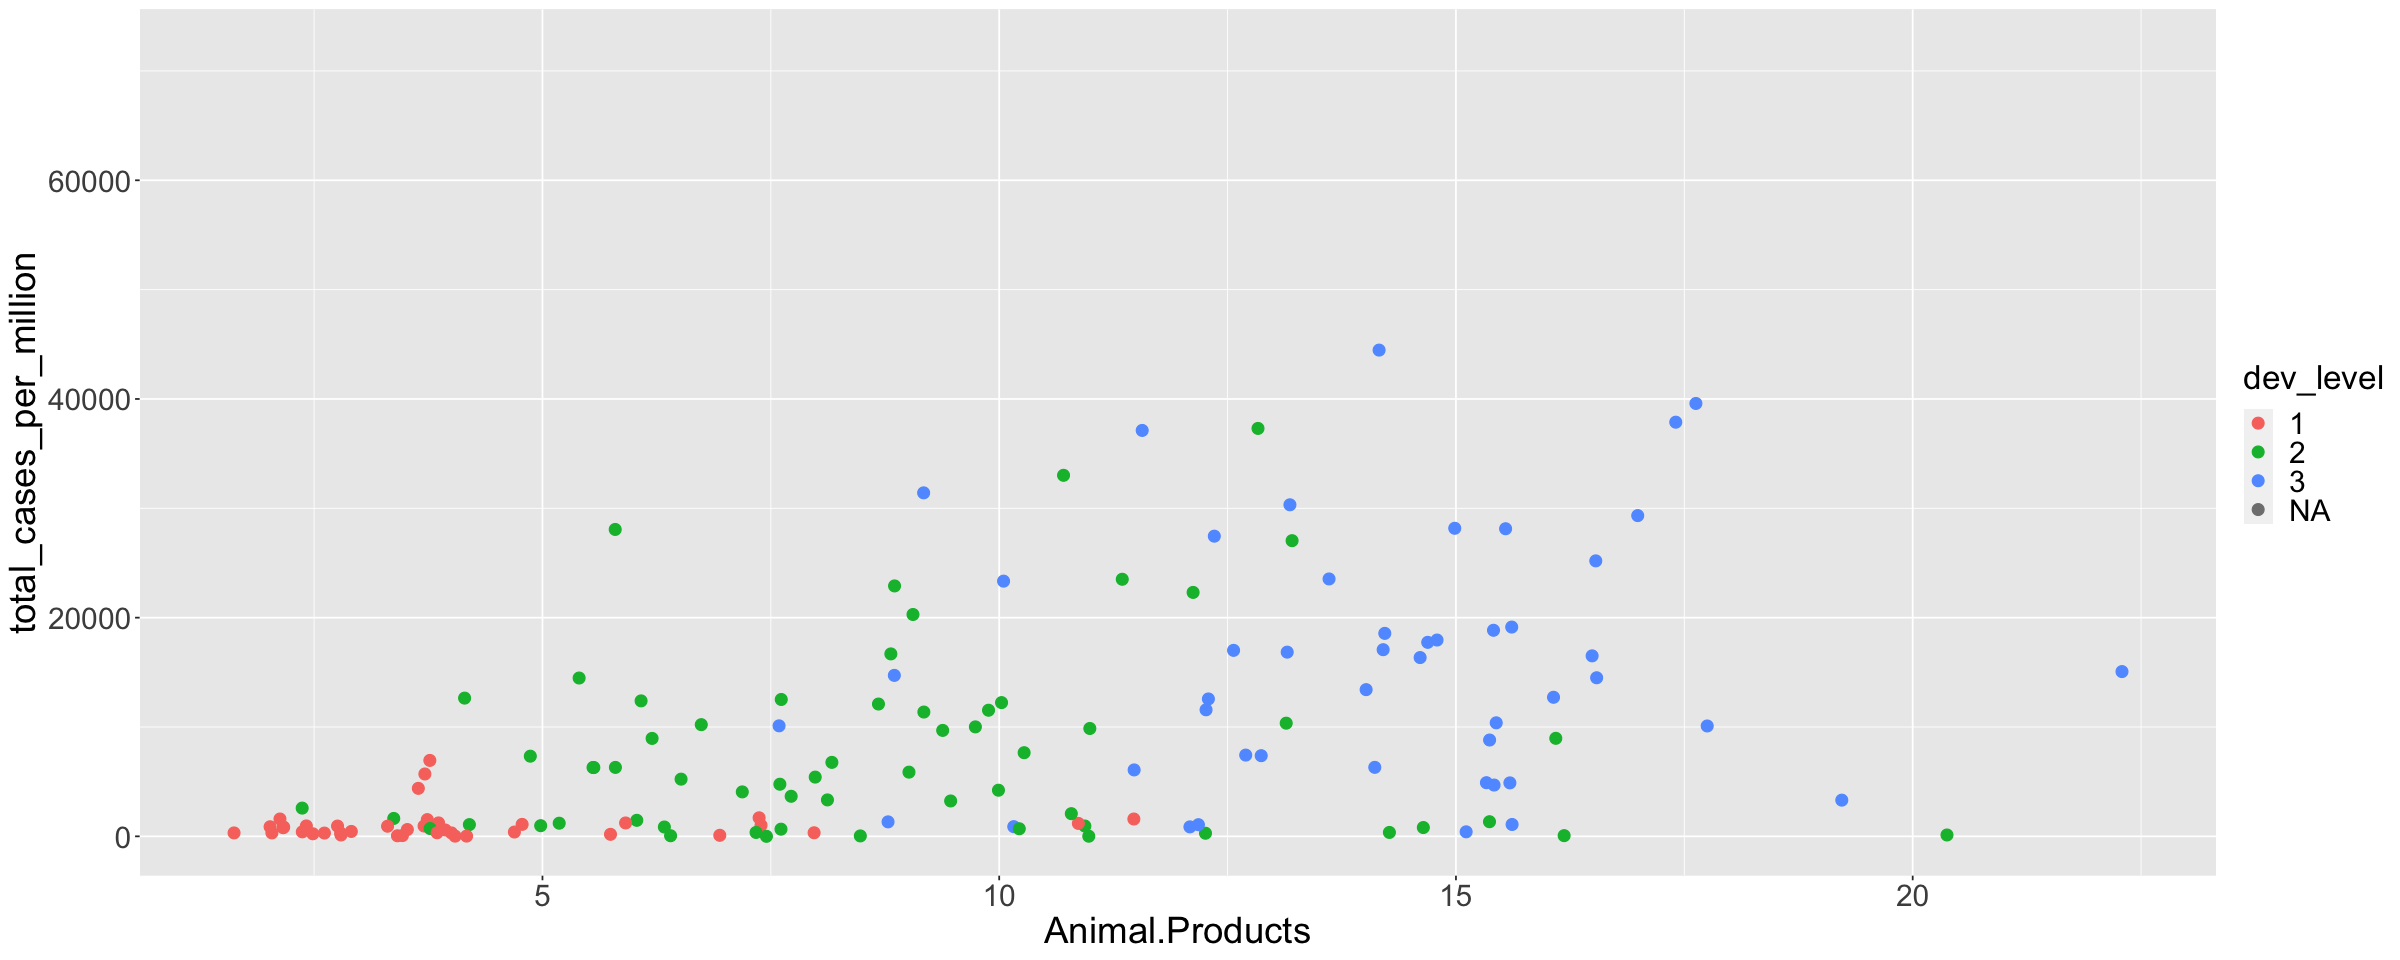

In [13]:
# Produkty zwierzęce
ggplot(data=now, aes(x=Animal.Products, y=total_cases_per_million, color = dev_level))+
  geom_point(size = 3) + 
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

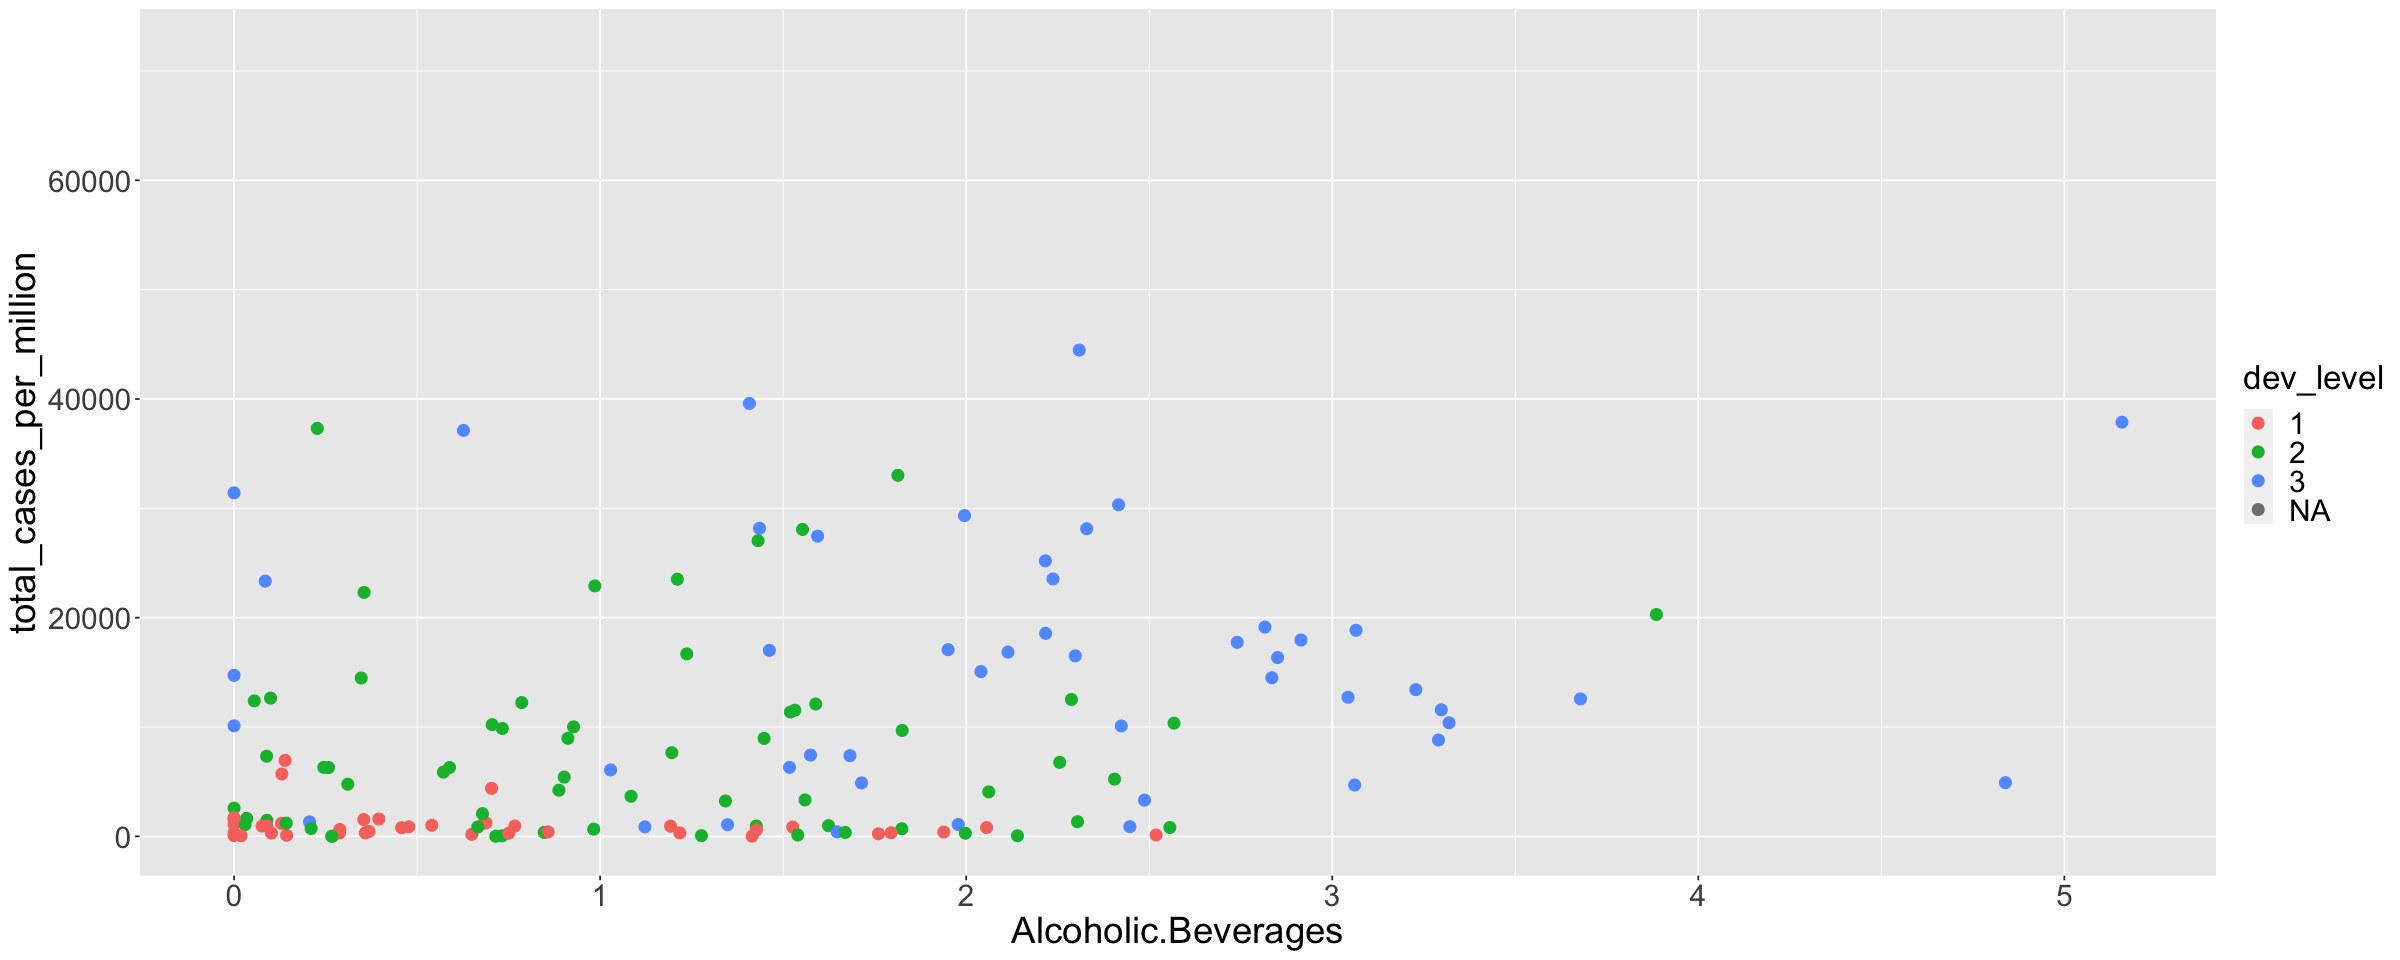

In [14]:
# Alkohol a liczba przypadków
ggplot(data=now, aes(x=Alcoholic.Beverages, y=total_cases_per_million, color = dev_level))+
  geom_point(size = 3) +
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

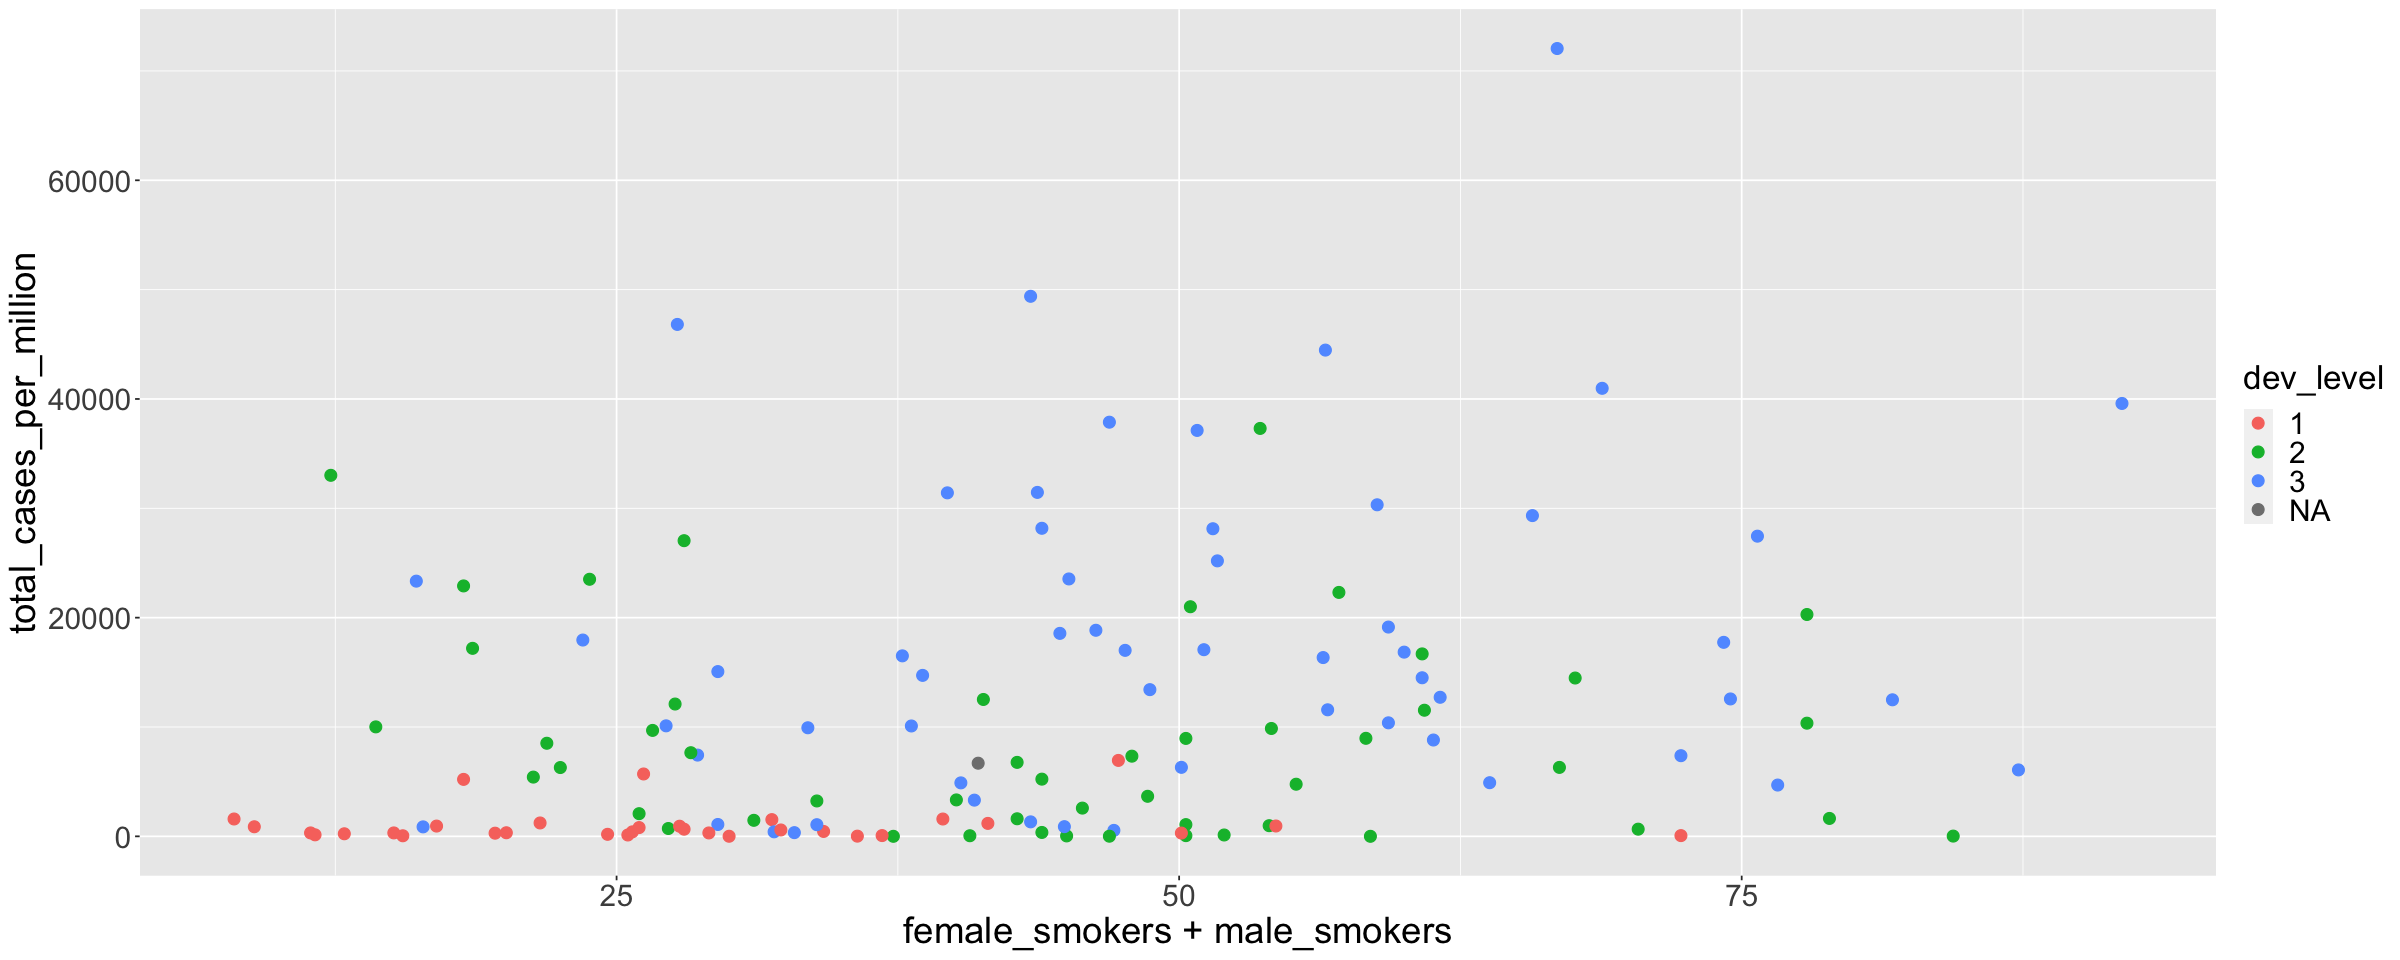

In [15]:
# palacze a liczba przypadków

ggplot(data = now, aes(y = total_cases_per_million, x = female_smokers+male_smokers, color = dev_level)) + 
  geom_point(size = 3) + 
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )

### Zależności dla krajów z przynajmneij 100 tys przypadków

`geom_smooth()` using formula 'y ~ x'



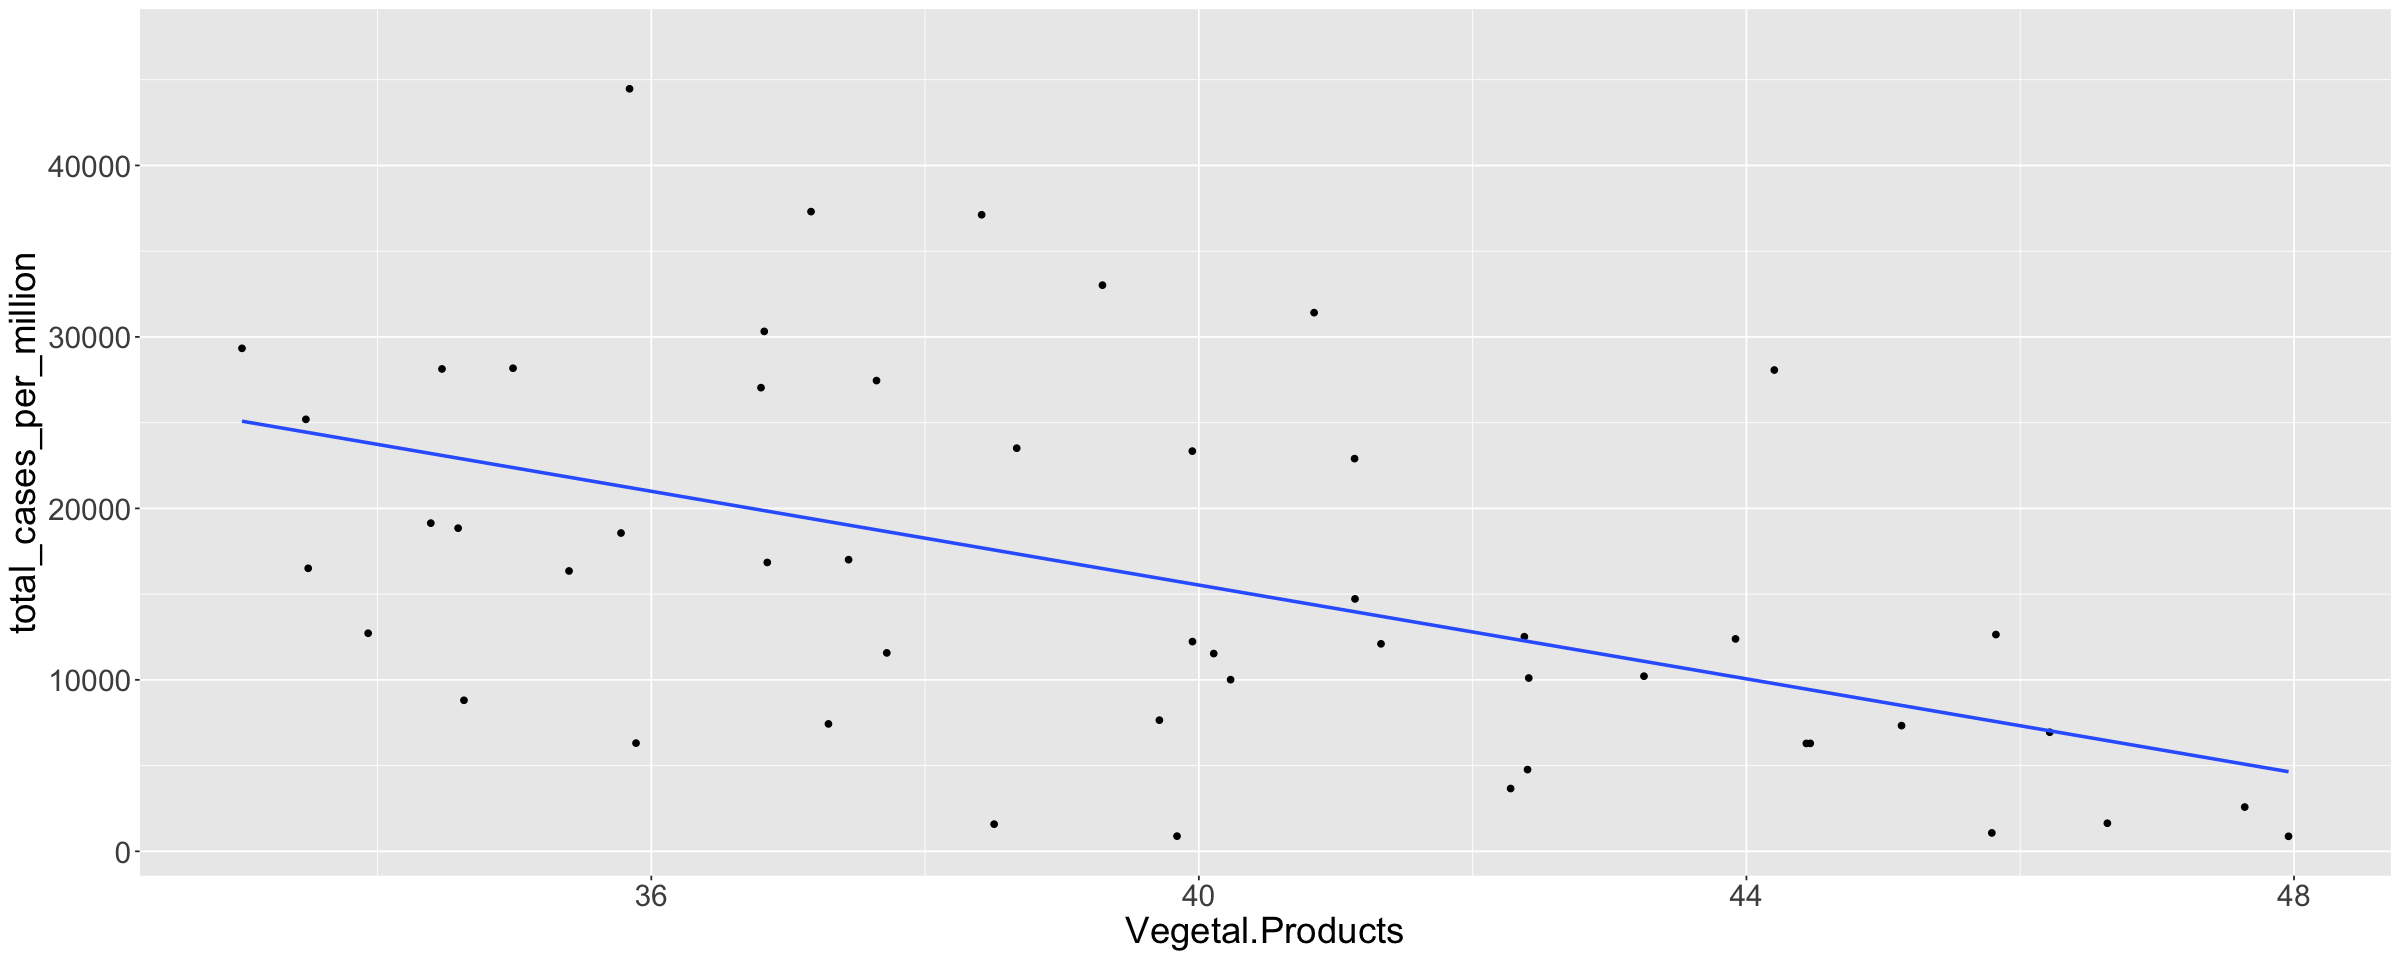

In [16]:
# produkty wegetariańskie a liczba przypadków

ggplot(sto, aes(x = Vegetal.Products, y = total_cases_per_million)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22)
    )

`geom_smooth()` using formula 'y ~ x'



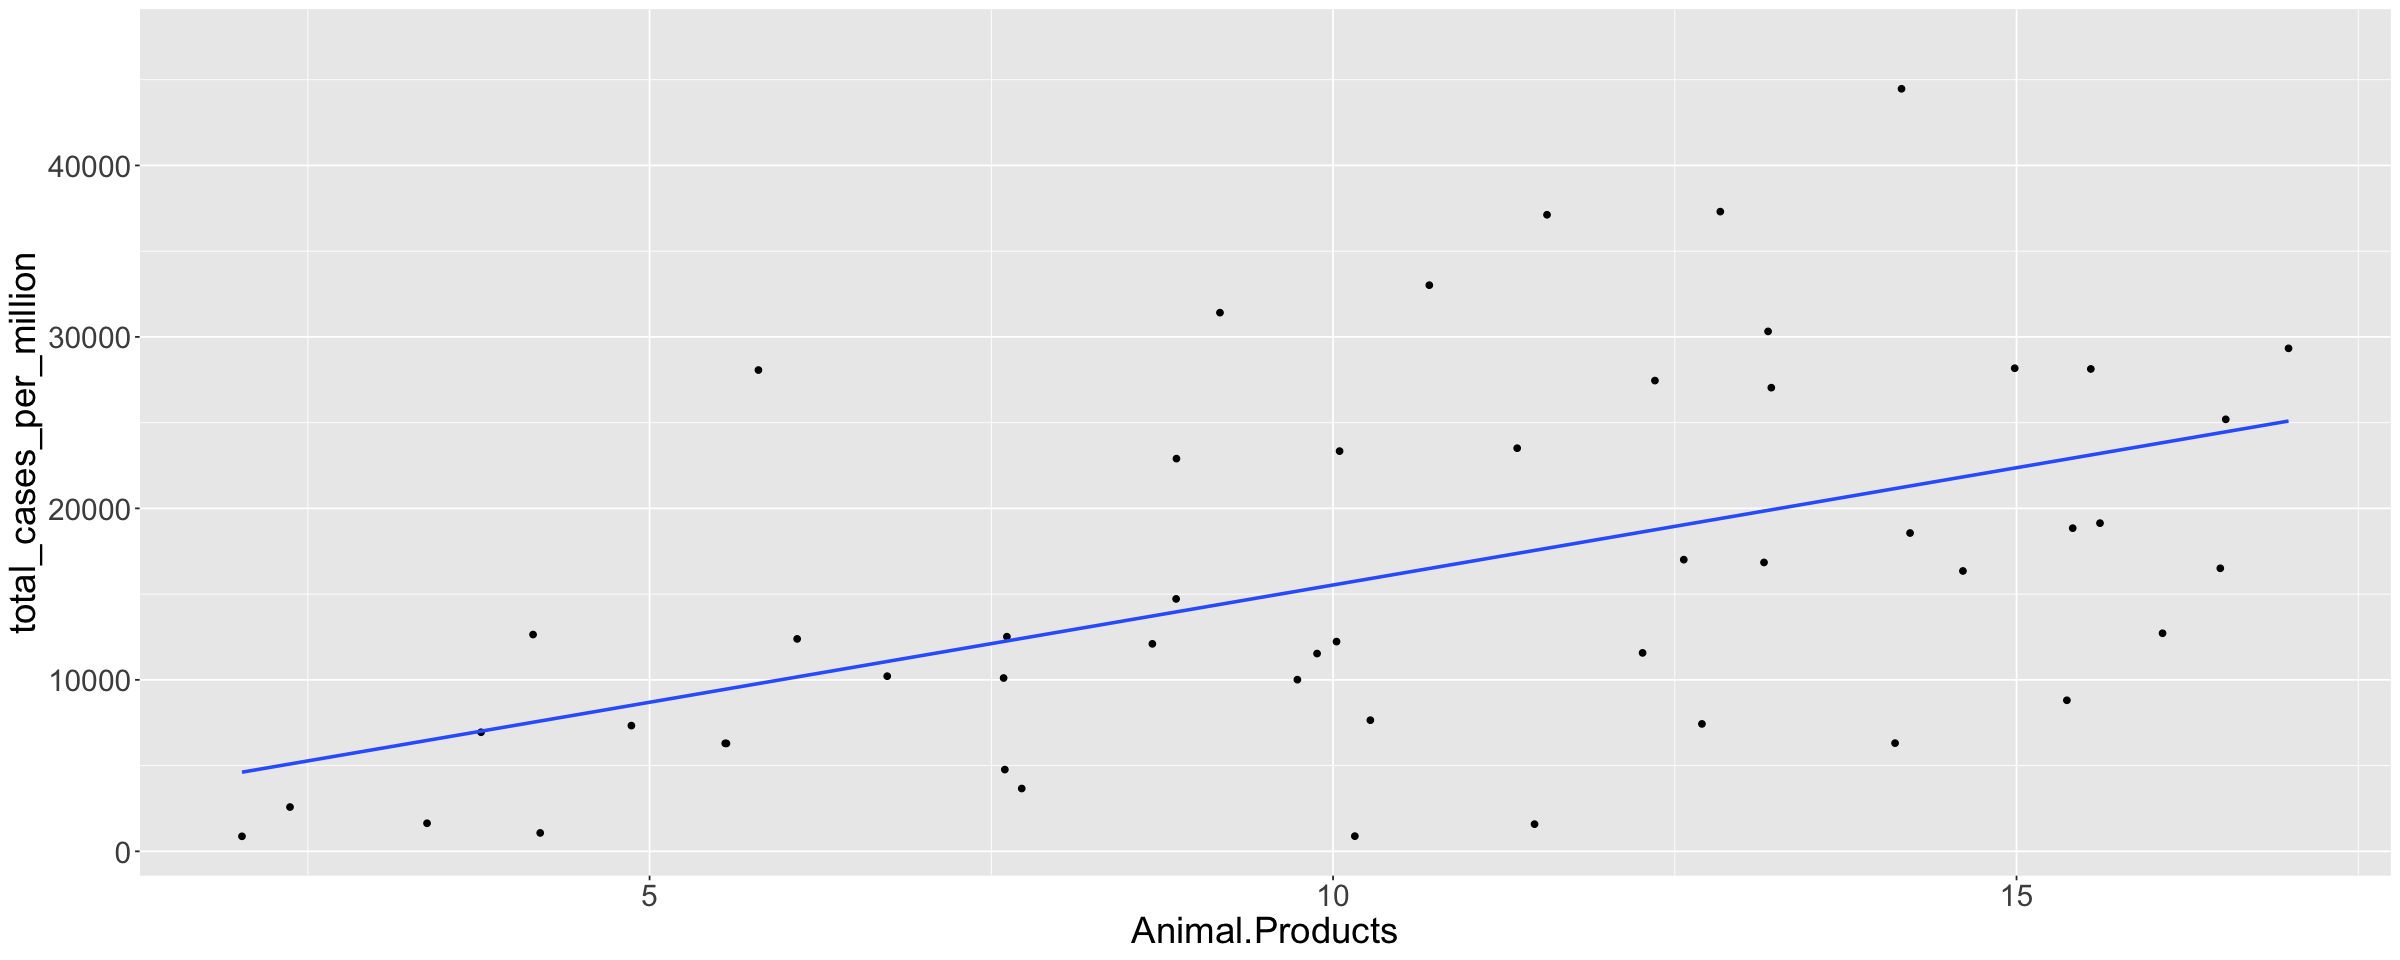

In [17]:
#produkty zwierzęce a liczba przypadków

ggplot(sto, aes(x = Animal.Products, y = total_cases_per_million))+
  geom_point() +
  geom_smooth(method = lm, se = FALSE) + 
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22)
    )

`geom_smooth()` using formula 'y ~ x'



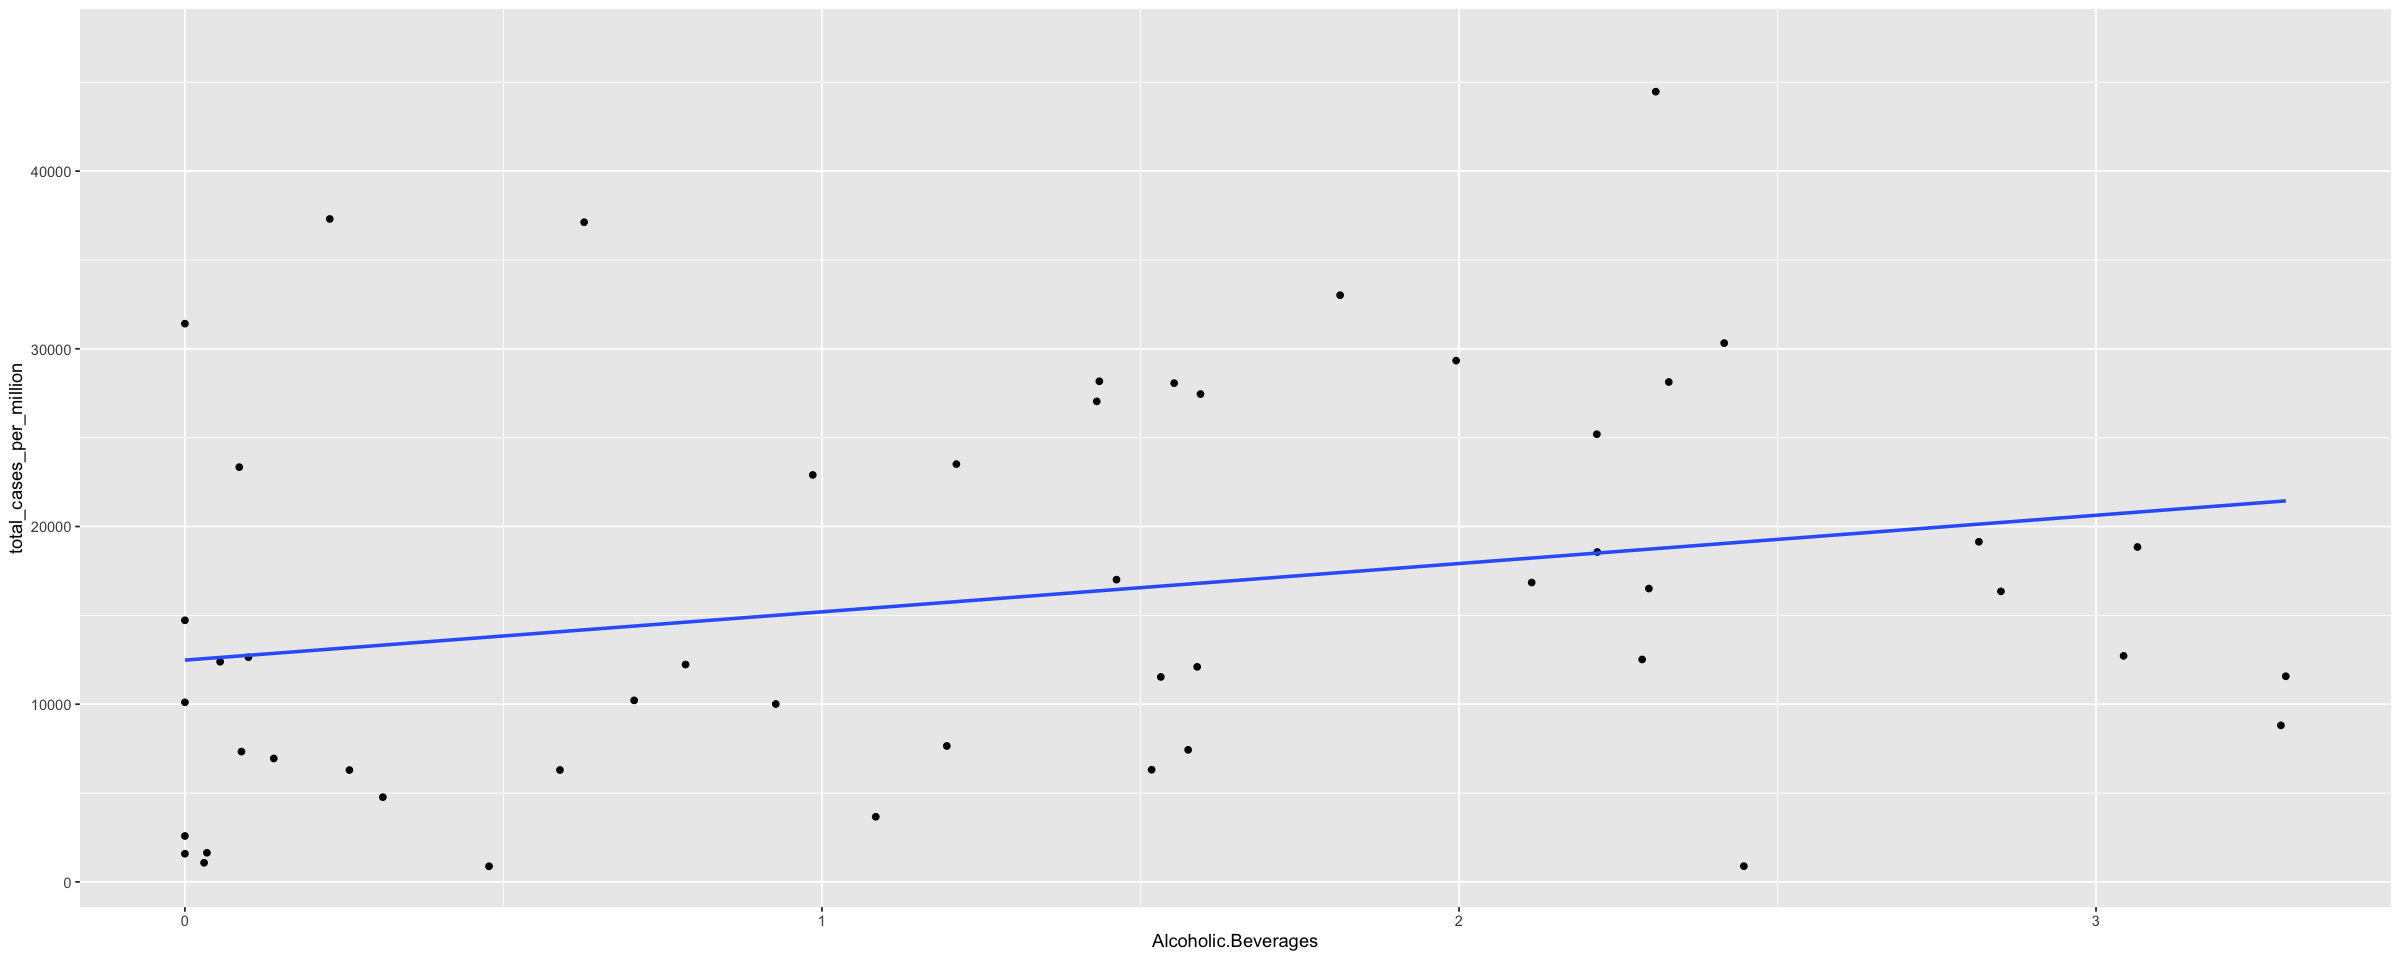

In [18]:
#alkohol a liczba przypadków

ggplot(sto, aes(x = Alcoholic.Beverages, y = total_cases_per_million))+
  geom_point() +
  geom_smooth(method = lm, se = FALSE)

`geom_smooth()` using formula 'y ~ x'



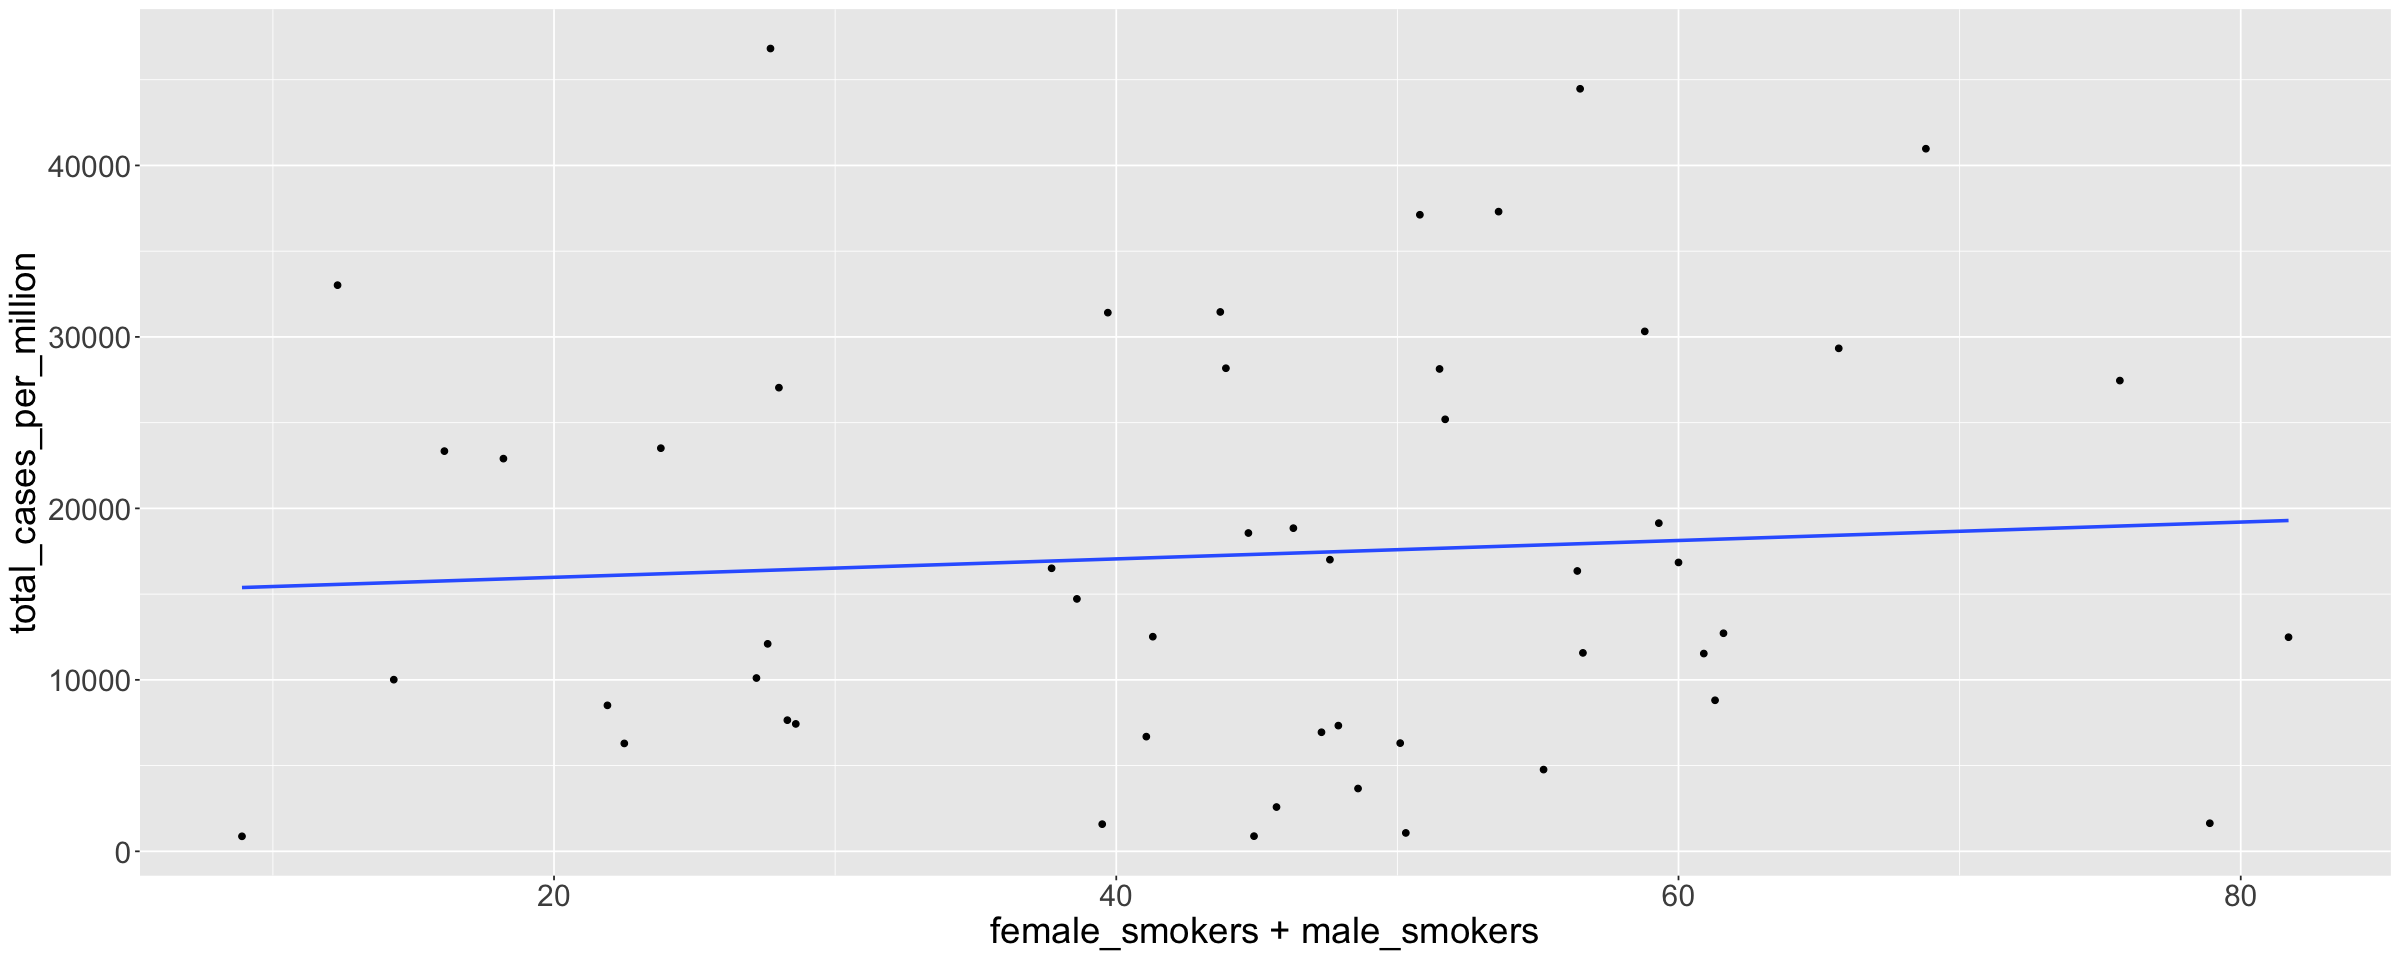

In [19]:
#palacze a liczba przypadków

ggplot(sto, aes(x = female_smokers+male_smokers, y = total_cases_per_million))+
  geom_point() +
  geom_smooth(method = lm, se = FALSE) + 
    theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22)
    )

## Choroby układu krążenia

Zgony z powodu układu krążenia są częstsze w krajach z małą liczbą śmiercu z pwodu wirusa, jest to bardzo zaskakująca tendencja.

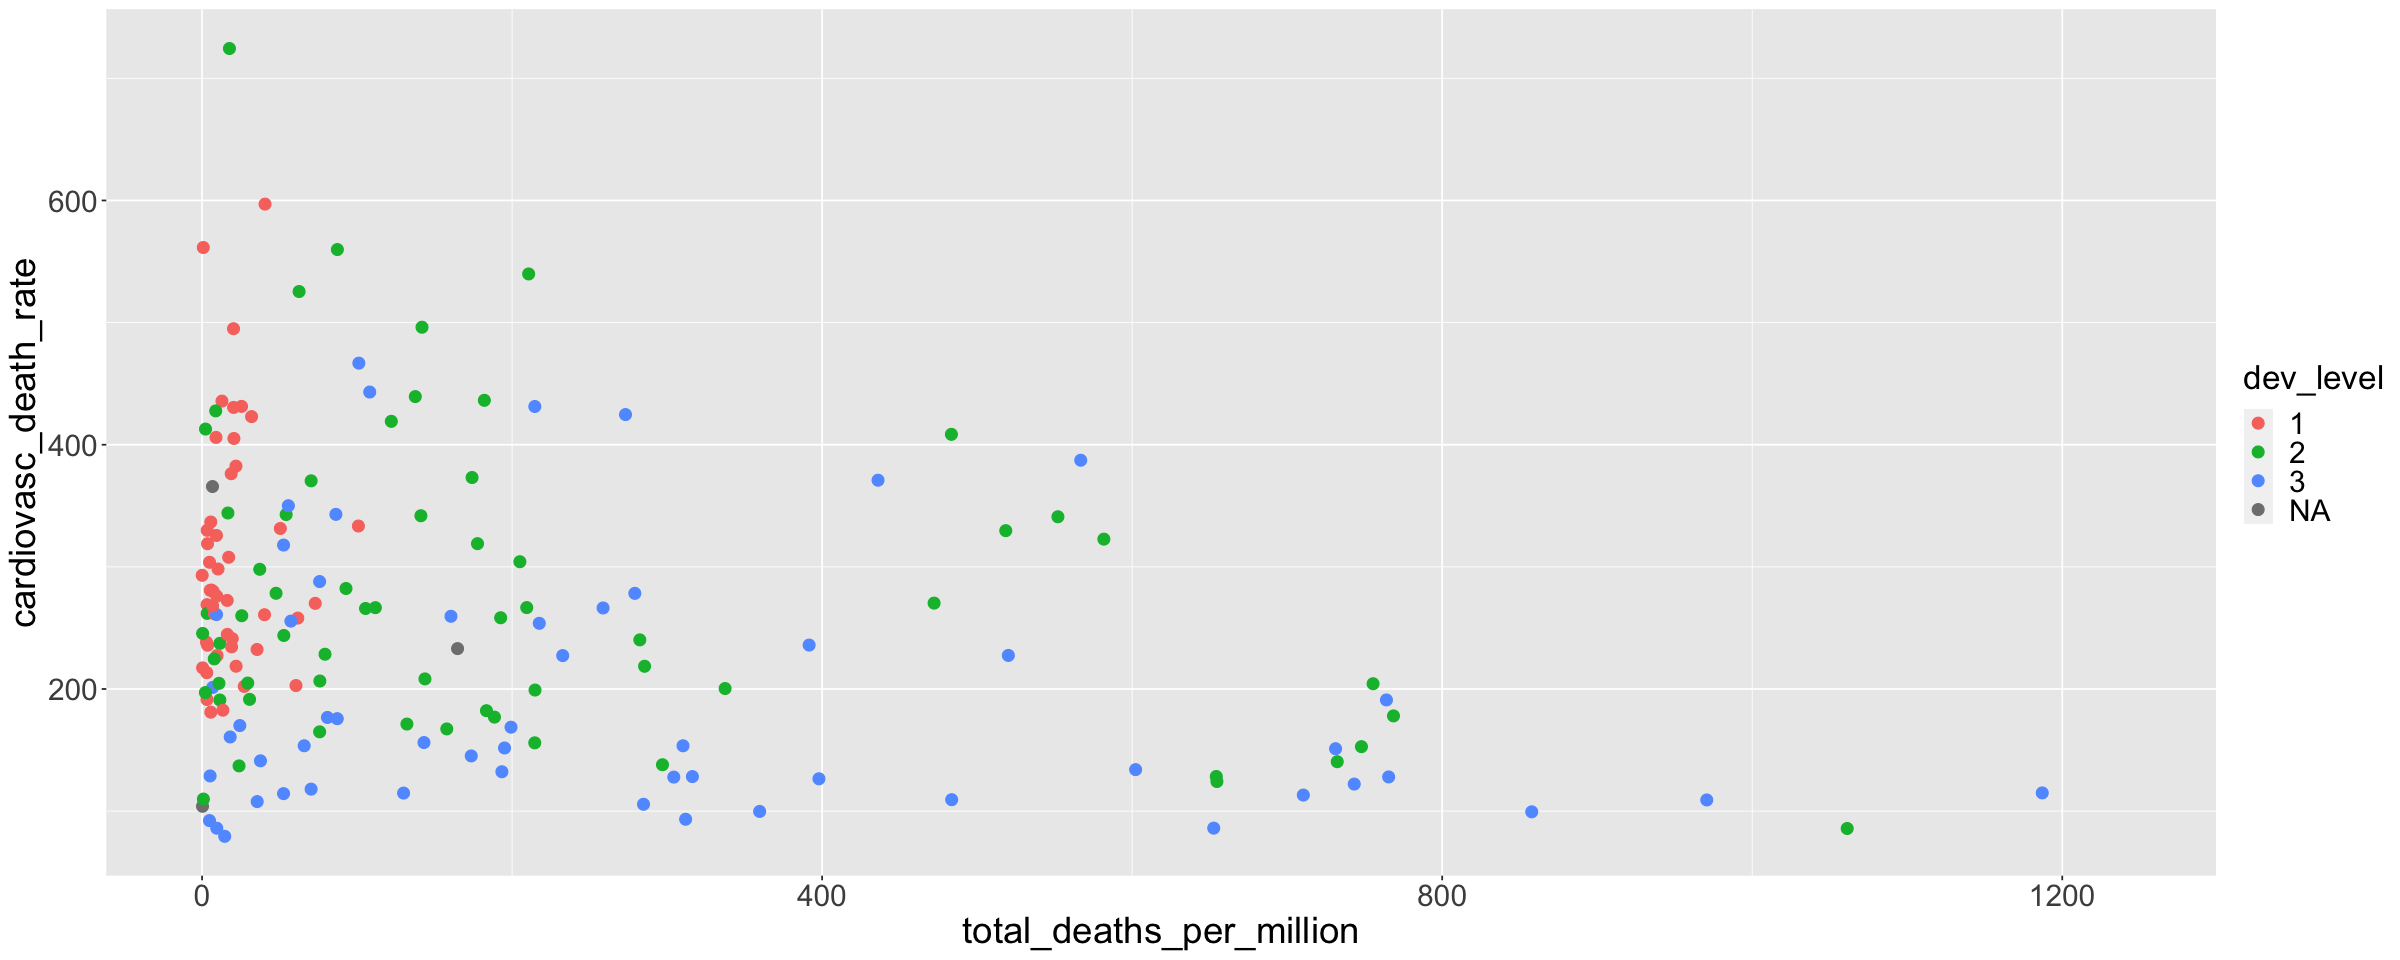

In [20]:
# zgony z powodu układu krążenia vs liczba smierci na million
ggplot(now, aes(x = total_deaths_per_million, y=cardiovasc_death_rate, color = dev_level))+
  geom_point(size = 3) + theme(
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        axis.title = element_text(size = 22),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 18)
    )